In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

# Exploratory Data Analyses

In [254]:
df_input = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/input.csv")
df_producao = pd.read_csv("producao_mensal_cimento_2003_2022.csv")
df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target.csv")
#df_target = pd.read_csv("https://raw.githubusercontent.com/LeiteJu/TCC/main/data/csv/target_ac.csv")

In [255]:
df_input = pd.merge(left=df_input, right=df_producao, how="left", on=["estados", "data"])

## EDA - INPUT Features

In [256]:
df_input.shape

(9396, 18)

In [257]:
df_input.head()

estados    data        pib_pc     pib_pmc  pib_pcpt   populacao  \
0      AC  199101  3.281564e+06   14.663360  0.708721    417102.0   
1      AL  199101  1.419695e+07   74.802077  0.510378   2512658.0   
2      AM  199101  1.481369e+07  192.541724  0.634686   2102766.0   
3      AP  199101  2.553397e+06   17.042118  0.793464    289035.0   
4      BA  199101  6.417557e+07  475.734256  0.488841  11867336.0   

         pib_cc  ipca  incc    igp     selic  idh_long  idh_renda  \
0  1.869529e+05  6.62   4.7  19.93  2.375185     0.645      0.647   
1  1.045711e+06  6.62   4.7  19.93  2.375185     0.552      0.574   
2  1.727997e+06  6.62   4.7  19.93  2.375185     0.668      0.527   
3  7.302087e+04  6.62   4.7  19.93  2.375185     0.645      0.620   
4  6.191147e+06  6.62   4.7  19.93  2.375185     0.582      0.605   

   idh_educacao   nfsp       estoque  desemprego  producao  
0         0.176  11.17  4.782147e+06    9.216314       NaN  
1         0.174  11.17  4.782147e+06    8.980849       NaN  
2         0.254  11.17  4.782147e+06   11.555730       NaN  
3         0.204  11.17  4.782147e+06    5.922940       NaN  
4         0.182  11.17  4.782147e+06    8.211435       NaN

In [258]:
df_input.tail()

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
9391      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
9392      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
9393      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
9394      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
9395      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc  ipca  incc   igp    selic  idh_long  idh_renda  \
9391  9.031052e+06   5.9  0.17  1.74  0.02462      0.78       0.70   
9392  6.353526e+06   5.9  0.17  1.74  0.02462      0.87       0.71   
9393  8.019597e+05   5.9  0.17  1.74  0.02462      0.85       0.78   
9394  3.482197e+07   5.9  0.17  1.74  0.02462      0.80       0.80   
9395  8.160933e+05   5.9  0.17  1.74  0.02462      0.81       0.68   

      idh_educacao  nfsp       estoque  desemprego  producao  
9391          0.77  0.49  7.827728e+06        11.1   49593.0  
9392          0.78  0.49  7.827728e+06        11.1   58832.0  
9393          0.83  0.49  7.827728e+06        11.1   55602.0  
9394          0.64  0.49  7.827728e+06        11.1   45010.0  
9395          0.73  0.49  7.827728e+06        11.1   45315.0

In [259]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9396 entries, 0 to 9395
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   estados       9396 non-null   object 
 1   data          9396 non-null   int64  
 2   pib_pc        9396 non-null   float64
 3   pib_pmc       9396 non-null   float64
 4   pib_pcpt      9396 non-null   float64
 5   populacao     9396 non-null   float64
 6   pib_cc        9396 non-null   float64
 7   ipca          9396 non-null   float64
 8   incc          9396 non-null   float64
 9   igp           9396 non-null   float64
 10  selic         9396 non-null   float64
 11  idh_long      9396 non-null   float64
 12  idh_renda     9396 non-null   float64
 13  idh_educacao  9396 non-null   float64
 14  nfsp          9396 non-null   float64
 15  estoque       9396 non-null   float64
 16  desemprego    9396 non-null   float64
 17  producao      3887 non-null   float64
dtypes: float64(16), int64(1), ob

In [260]:
#df_input["desemprego"] = df_input["desemprego"].apply(lambda x: -1 if x == "Brasil" else x).astype(float)

## 1. Structure Investigation

In [261]:
df_input.dtypes.value_counts()

float64    16
object      1
int64       1
dtype: int64

### 1.1 Structure of numerical features


In [262]:
df_input.describe().transpose()

count          mean           std           min           25%  \
data          9396.0  2.005065e+05  8.367117e+02  1.991010e+05  1.998038e+05   
pib_pc        9396.0  9.680973e+07  1.689762e+08  2.291290e+06  1.751462e+07   
pib_pmc       9396.0  8.142335e+07  1.840250e+08  1.187132e+01  6.214983e+06   
pib_pcpt      9396.0  1.105420e+00  6.663839e-01  3.445102e-01  6.751962e-01   
populacao     9396.0  5.477219e+06  6.511045e+06  2.175830e+05  1.639035e+06   
pib_cc        9396.0  5.818546e+06  9.272548e+06  2.102823e+03  1.197217e+06   
ipca          9396.0  1.412420e+02  3.135630e+02  4.400000e-01  3.627500e+00   
incc          9396.0  8.764569e+00  1.280732e+01 -5.000000e-01  5.800000e-01   
igp           9396.0  3.878477e+00  9.252582e+00 -1.240000e+00  2.300000e-01   
selic         9396.0  2.360039e-01  4.590336e-01  2.462000e-02  4.282221e-02   
idh_long      9396.0  7.538359e-01  7.106697e-02  5.510000e-01  7.045556e-01   
idh_renda     9396.0  6.733225e-01  7.234772e-02  4.780000e-01  6.258000e-01   
idh_educacao  9396.0  5.082982e-01  1.701918e-01  1.550000e-01  3.647000e-01   
nfsp          9396.0  3.864540e+00  6.648523e+00 -7.000000e-02  7.575000e-01   
estoque       9396.0  6.411083e+06  9.760824e+05  4.782147e+06  5.656167e+06   
desemprego    9396.0  8.902102e+00  2.725671e+00  2.709864e+00  6.934425e+00   
producao      3887.0  1.803023e+05  2.320003e+05  1.653000e+03  5.067850e+04   

                       50%           75%           max  
data          2.005065e+05  2.012092e+05  2.019120e+05  
pib_pc        4.186368e+07  9.567711e+07  1.050063e+09  
pib_pmc       2.462307e+07  7.683858e+07  1.810701e+09  
pib_pcpt      9.236769e-01  1.340956e+00  3.999760e+00  
populacao     2.649747e+06  7.127956e+06  3.212606e+07  
pib_cc        2.566448e+06  6.259212e+06  5.822316e+07  
ipca          1.541000e+01  9.847750e+01  2.477150e+03  
incc          2.355000e+00  1.286250e+01  7.841000e+01  
igp           6.800000e-01  1.462500e+00  4.658000e+01  
selic         6.161469e-02  1.034916e-01  3.384407e+00  
idh_long      7.669000e-01  8.100000e-01  8.900000e-01  
idh_renda     6.711667e-01  7.296000e-01  8.630000e-01  
idh_educacao  5.220000e-01  6.530000e-01  8.400000e-01  
nfsp          1.505000e+00  2.742500e+00  3.824000e+01  
estoque       6.344077e+06  7.283723e+06  7.827728e+06  
desemprego    8.416935e+00  1.107150e+01  2.053946e+01  
producao      1.036500e+05  1.952855e+05  1.553703e+06

### 1.2 Structure of Non-Numeric features

In [263]:
df_input.describe(exclude='number').T

count unique top freq
estados  9396     27  ES  348

In [264]:
print(df_input["data"].min())
print(df_input["data"].max())

199101
201912


## 2. Quality Investigation

### 2.1. Unique values

<AxesSubplot:title={'center':'Unique Values per feature'}>

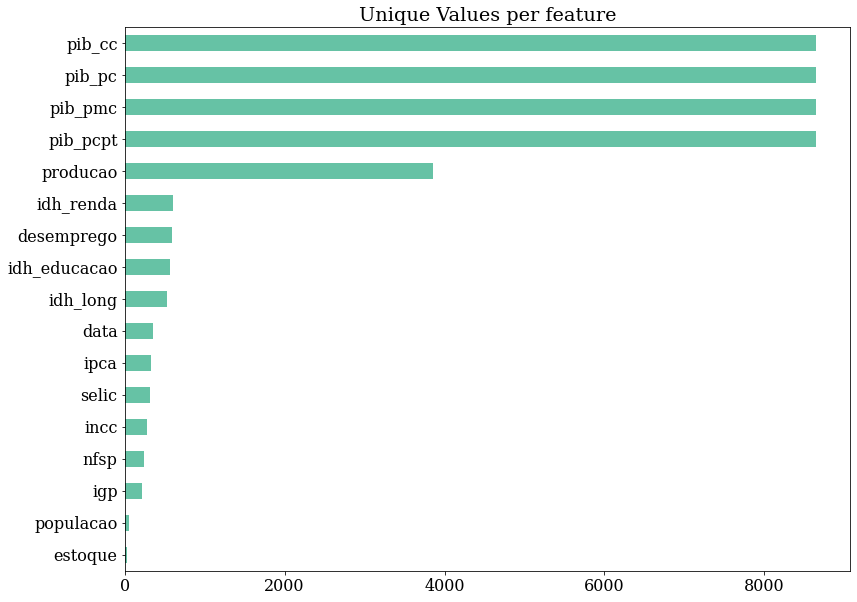

In [265]:
unique_values = df_input.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'estados')])

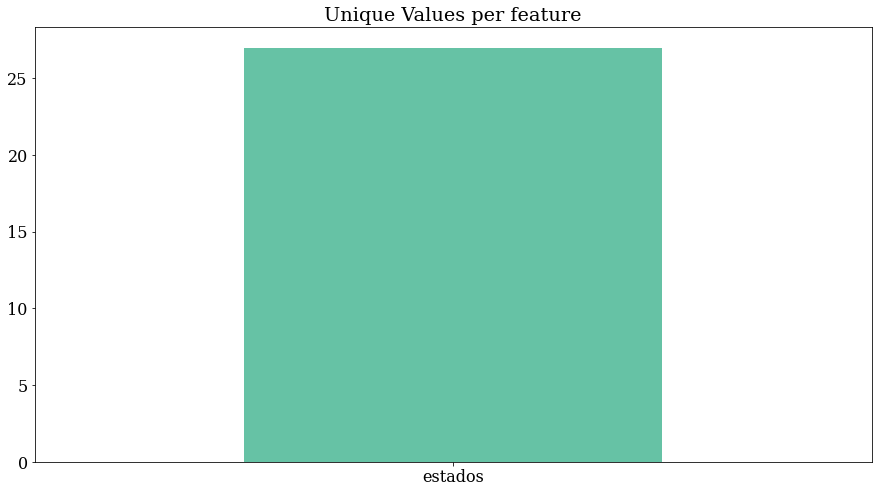

In [266]:
unique_values = df_input.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

### 2.2. Missing values

In [267]:
print("There are", df_input.isna().any().sum(), "variables with missing values from a total of", df_input.shape[1])

There are 1 variables with missing values from a total of 18


In [268]:
(df_input.isna().sum()/df_input.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<BarContainer object of 18 artists>

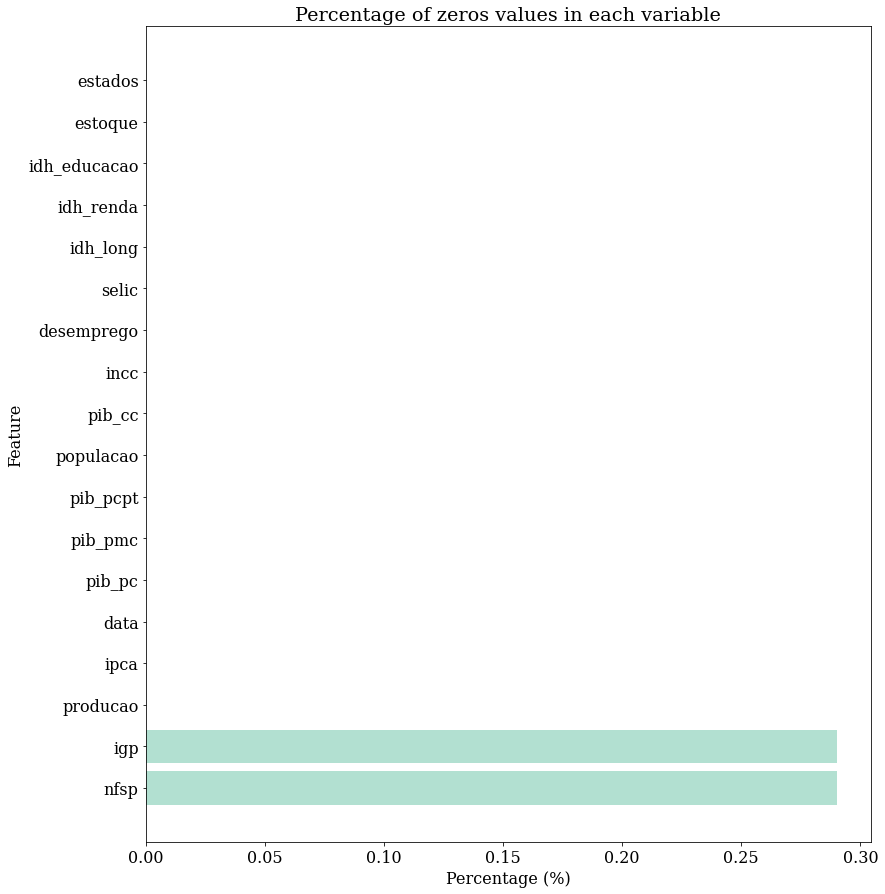

In [269]:
zeros_perc = (df_input == 0).sum(axis=0) / df_input.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

### 2.4. Duplicates

In [270]:
n_duplicates = df_input.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [271]:
n_duplicates = (
    df_input.drop(["data", "estados"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


## 3. Content Investigation

### 3.1. Feature distribution

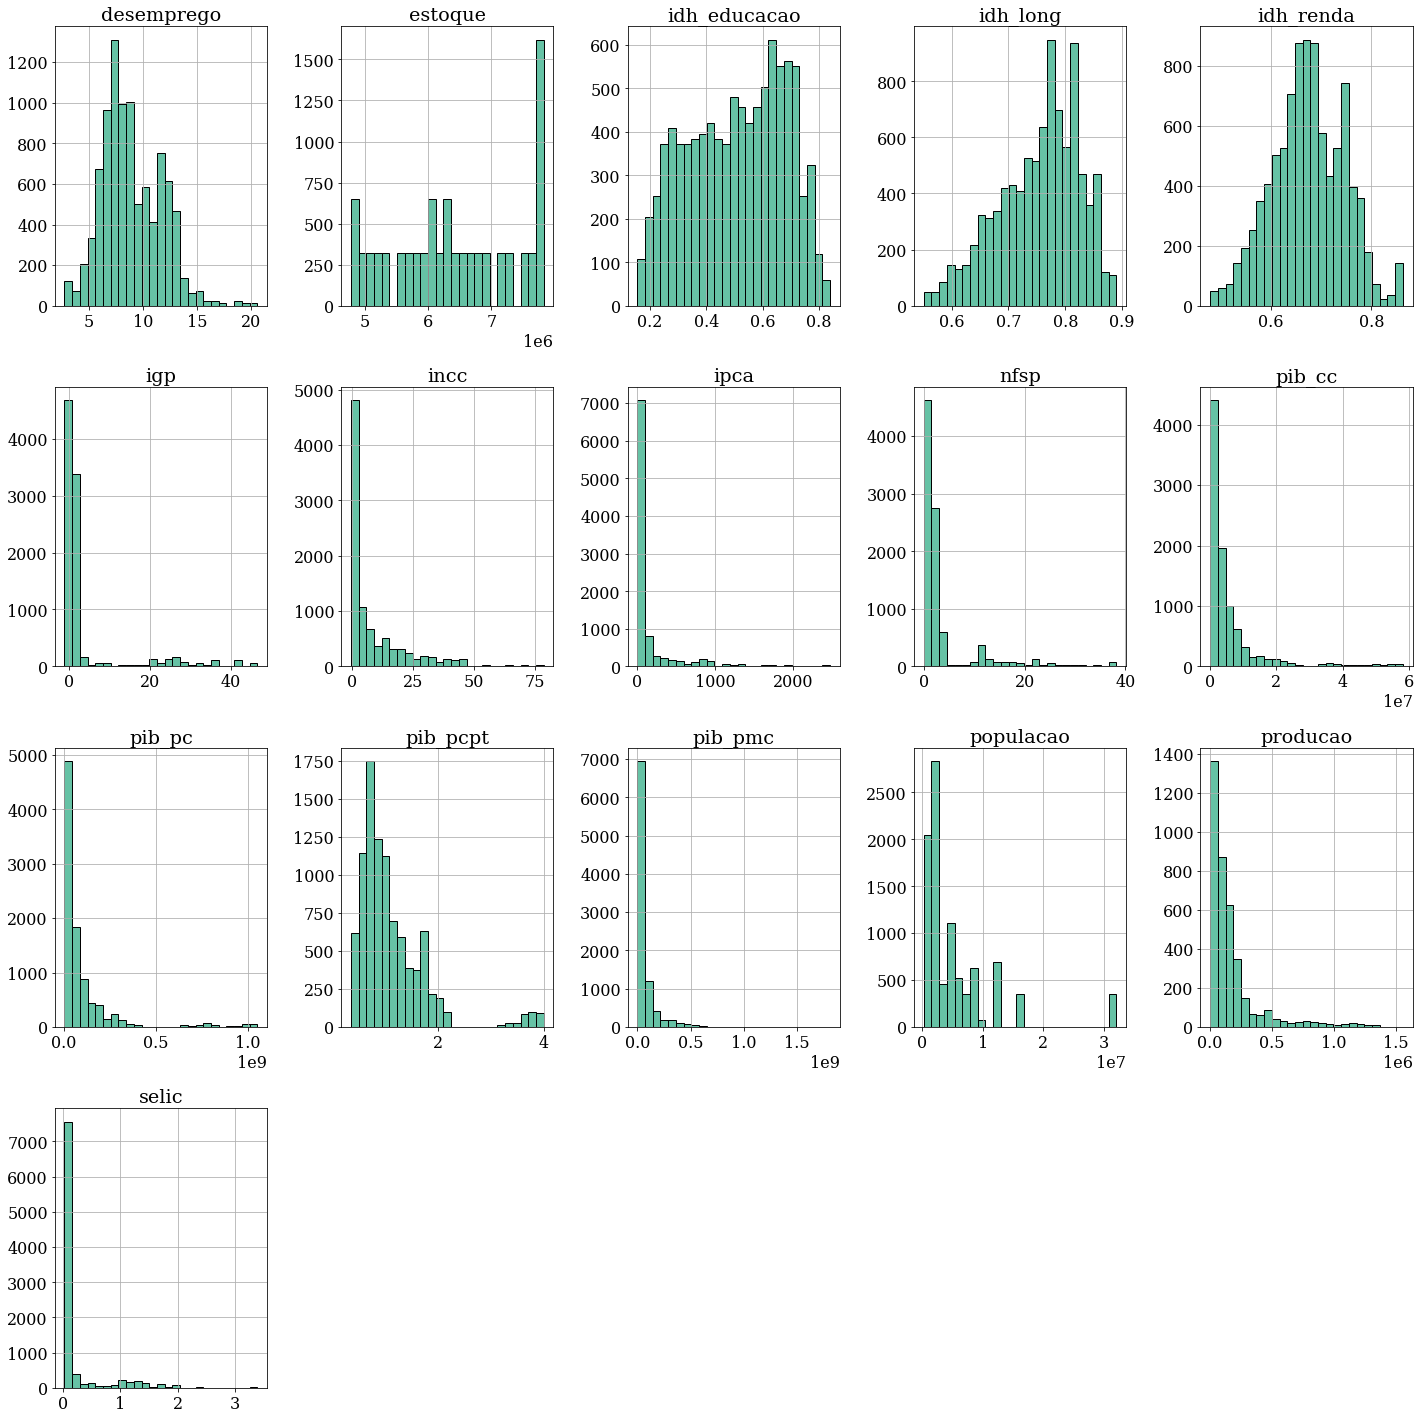

In [272]:
df_input.drop("data", axis=1).hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

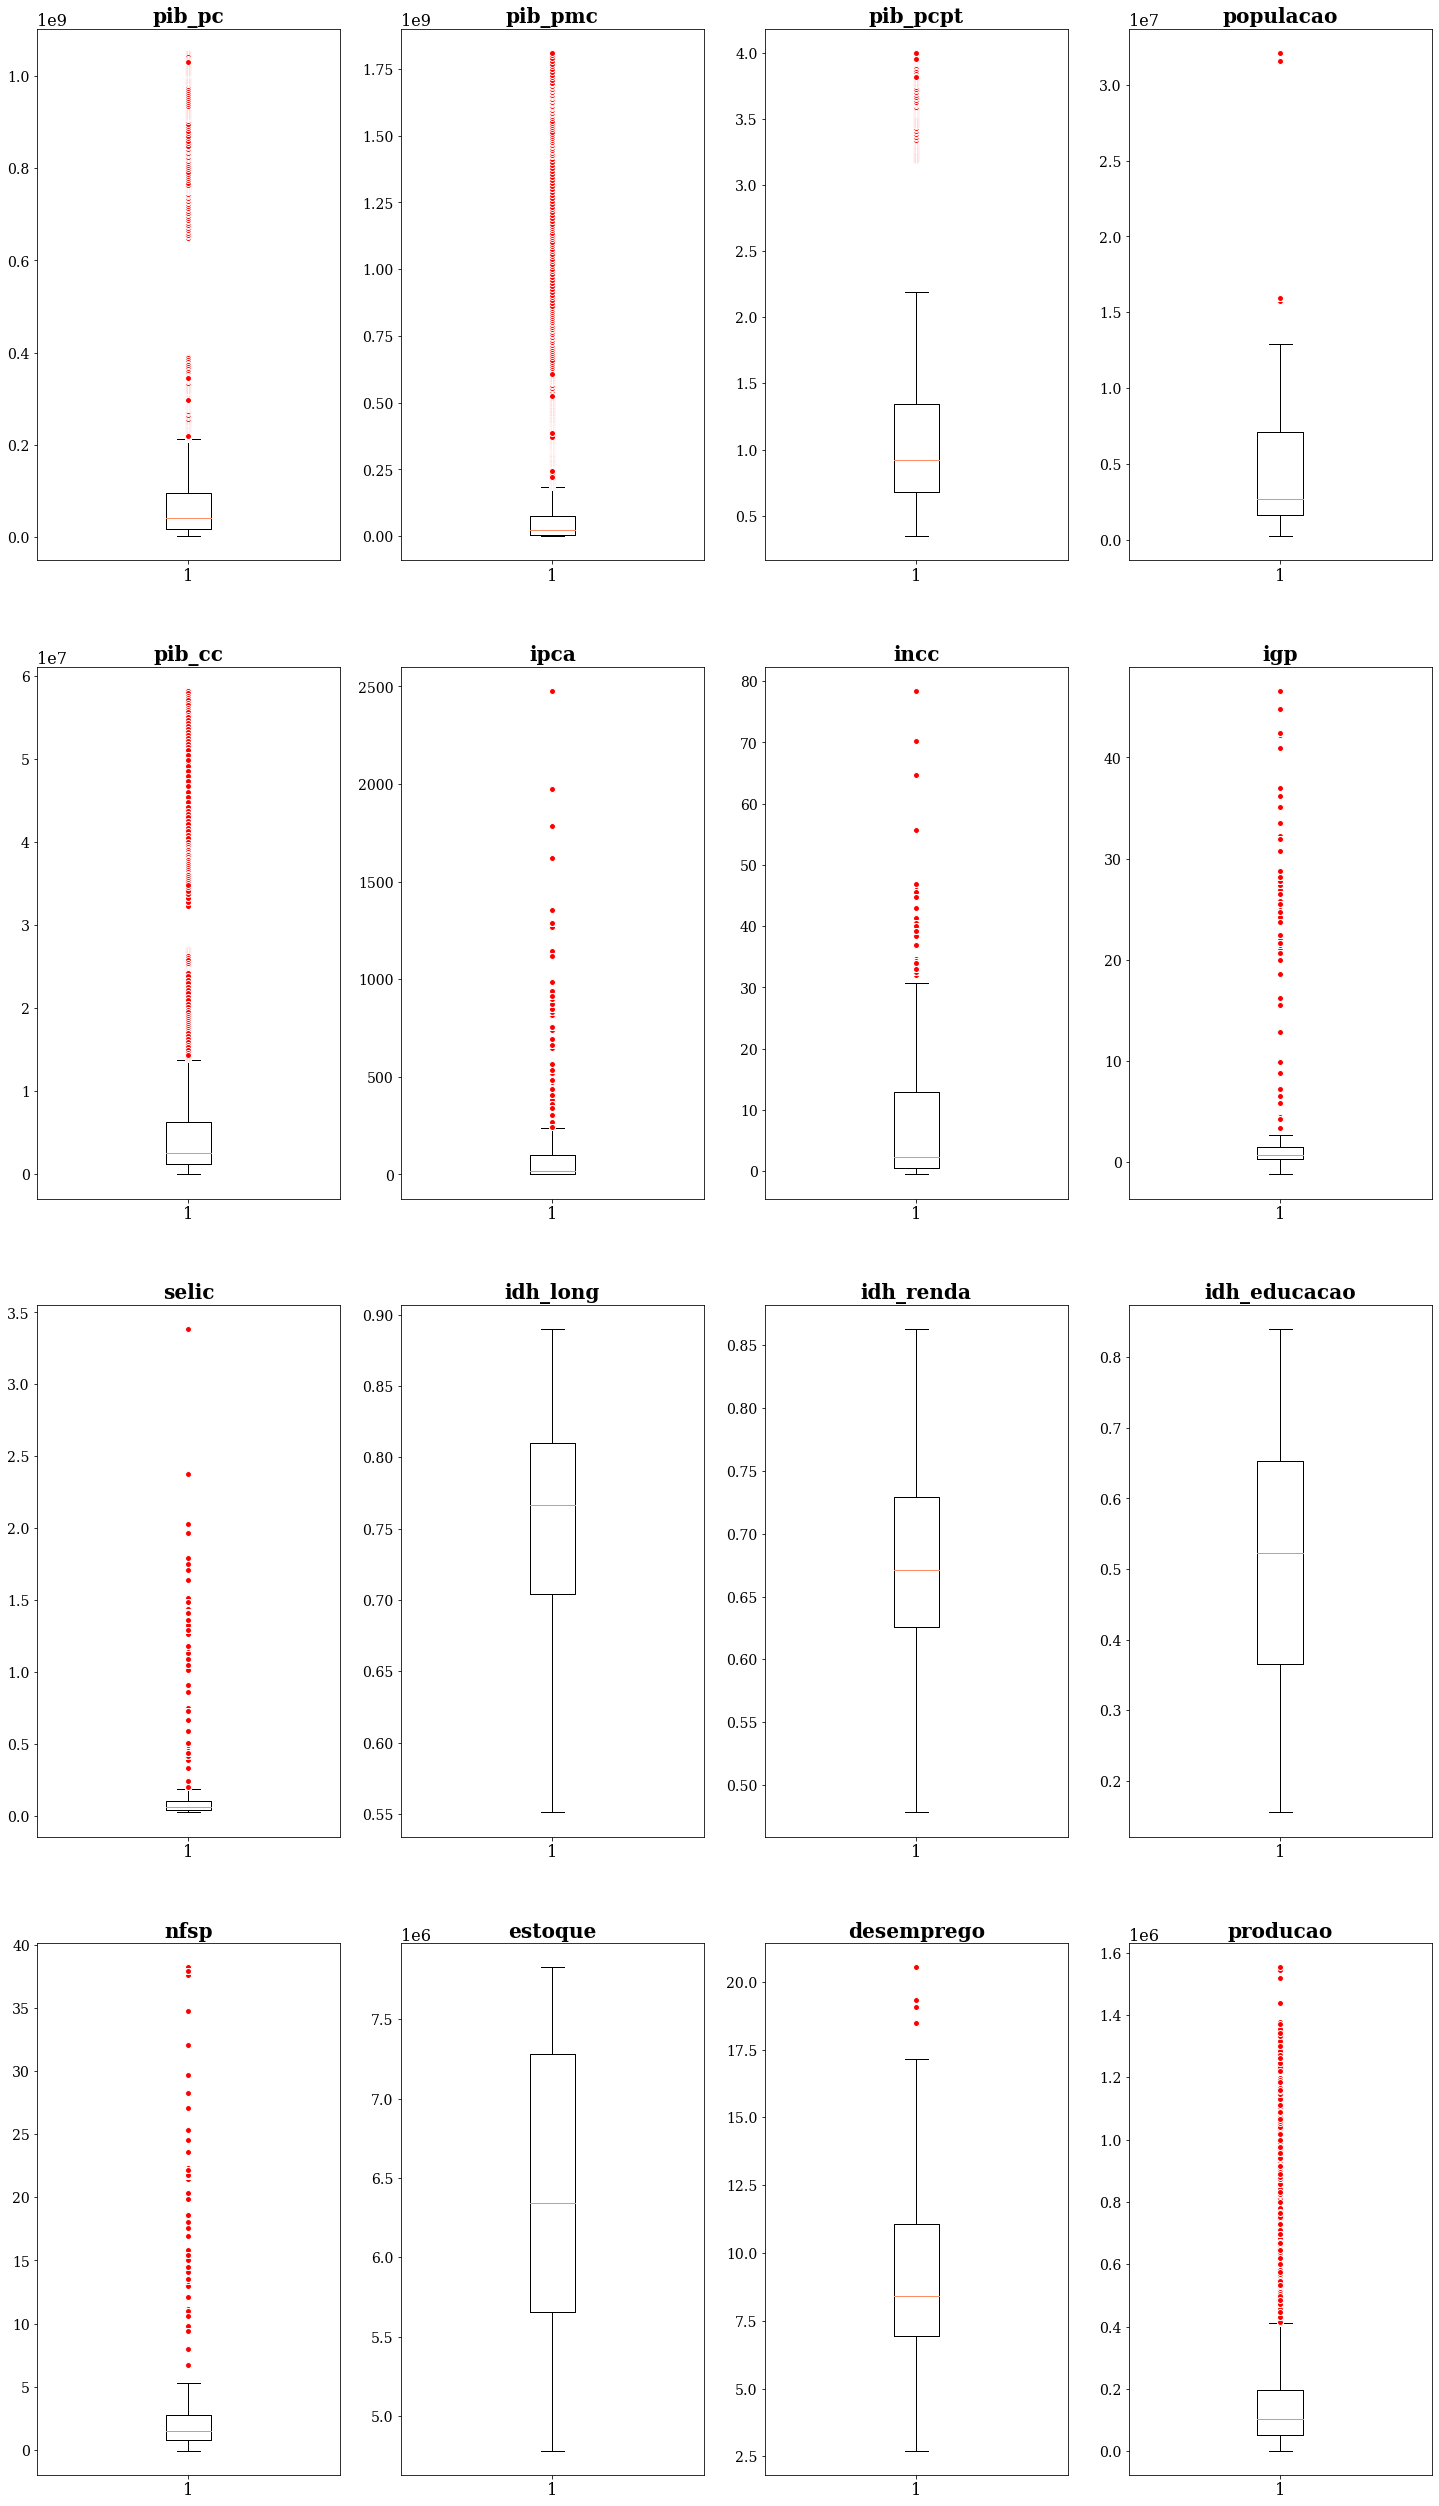

In [273]:
#Creating subplot of each column with its own scale
float64_columns = df_input.drop("data", axis=1).select_dtypes(include='float64').columns
df_float64_columns = df_input[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(4, 4, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

### 3.3. Feature Relationship

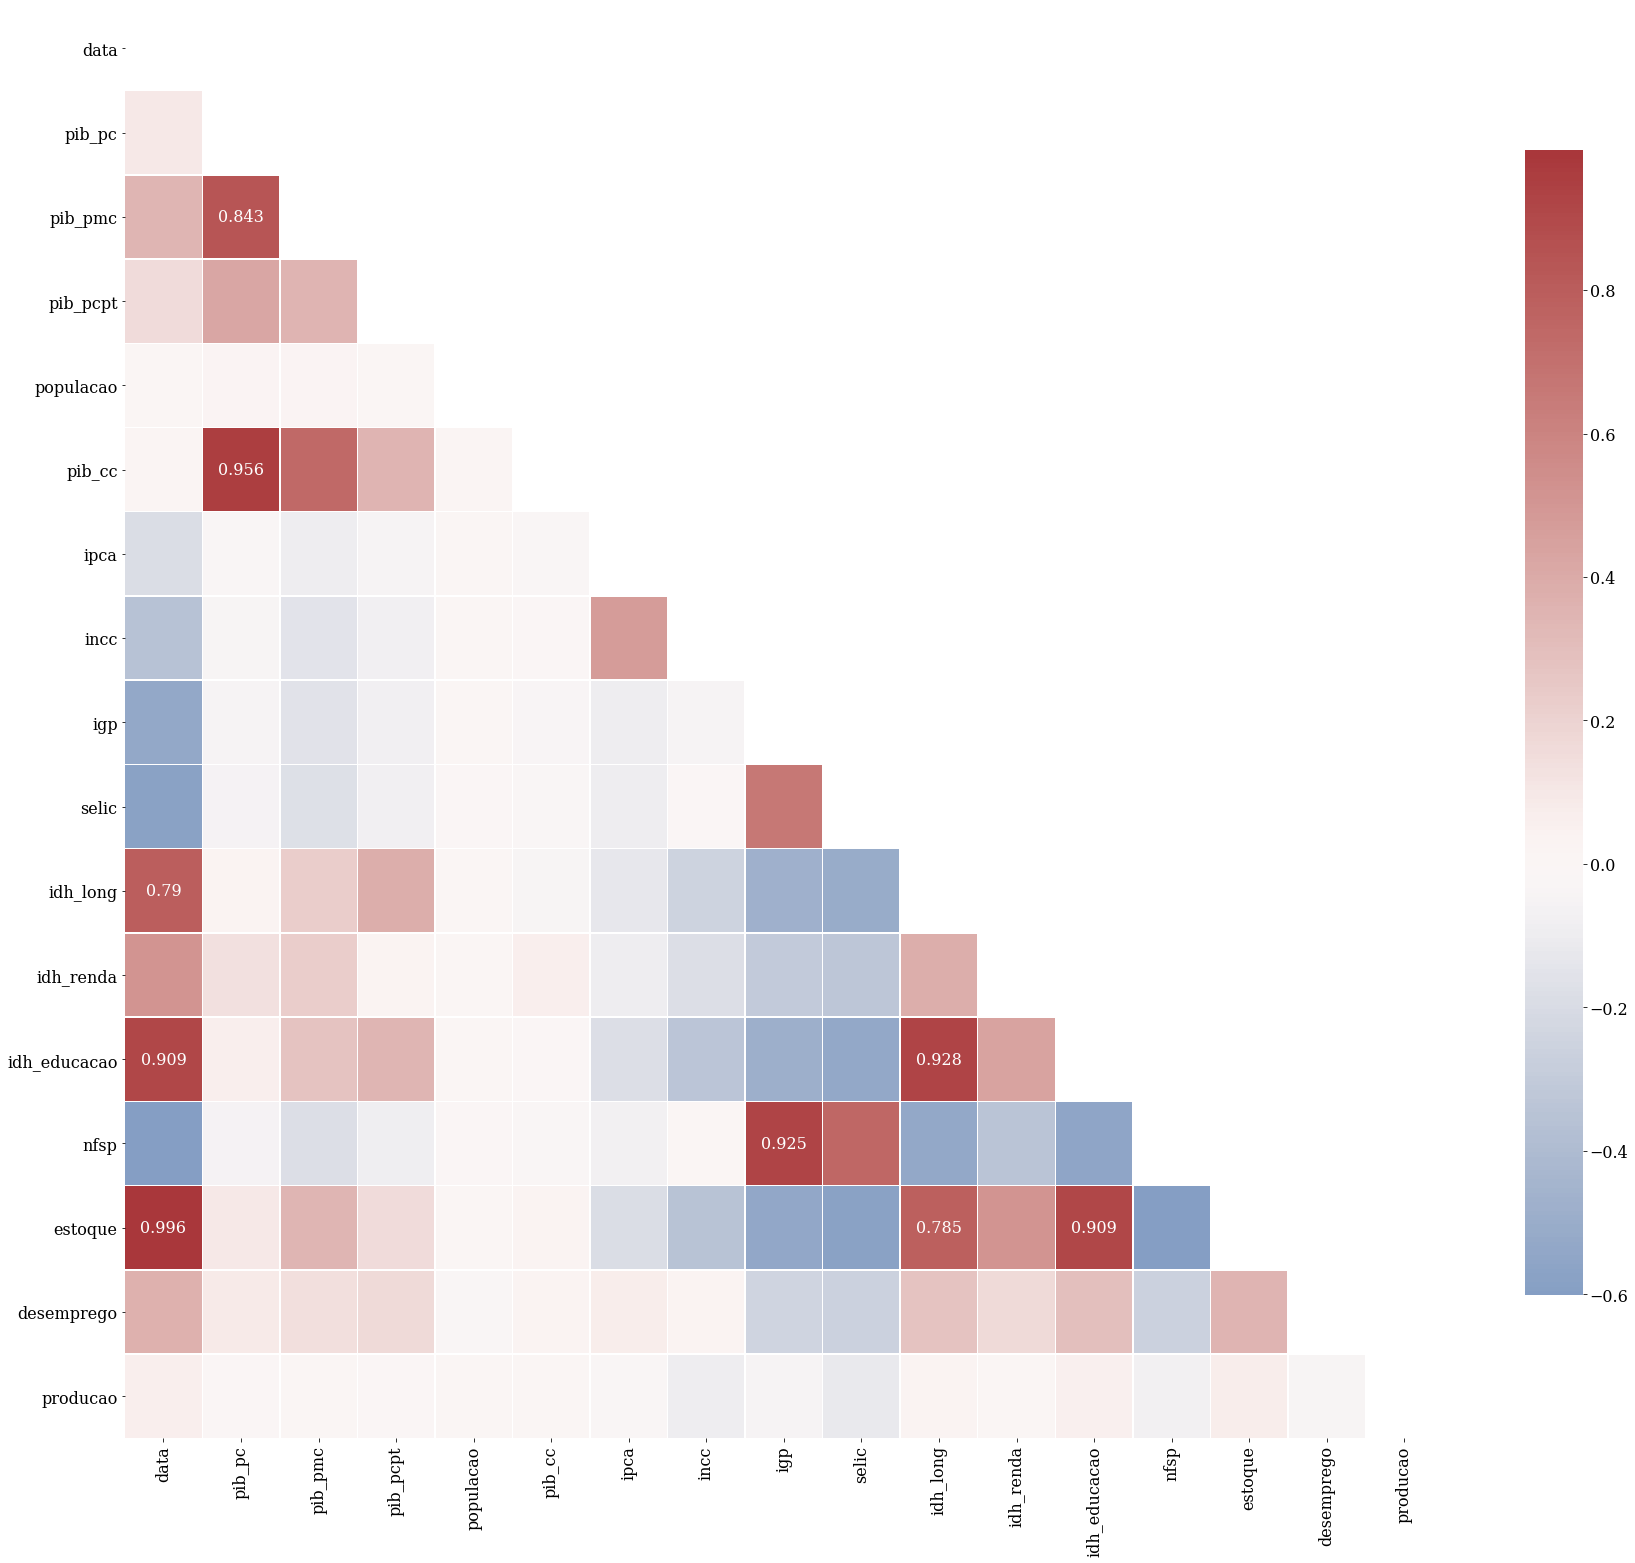

In [274]:
df_corr = df_input.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 3), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(25, 22))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [275]:
corr_matrix = df_input.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

data          estoque         0.995768
pib_pc        pib_cc          0.955945
idh_long      idh_educacao    0.927717
igp           nfsp            0.924957
data          idh_educacao    0.909420
idh_educacao  estoque         0.909110
pib_pc        pib_pmc         0.843445
data          idh_long        0.790454
idh_long      estoque         0.784846
selic         nfsp            0.749377
pib_pmc       pib_cc          0.734325
dtype: float64

## EDA - Target Variable

In [276]:
df_target.shape

(360, 28)

In [277]:
df_target.head()

data      AC       AL       AM      AP        BA       CE       DF  \
0  199001  1450.0  27421.0  21819.0   275.0   98829.0  47569.0  32020.0   
1  199002   938.0  20324.0  22683.0  1000.0   79133.0  42856.0  31612.0   
2  199003  1160.0  18584.0  13819.0  1100.0   72574.0  22004.0  37038.0   
3  199004     0.0  20972.0  16168.0  1000.0   77964.0  29635.0  32340.0   
4  199005  1643.0  30874.0  22104.0  2015.0  102595.0  45320.0  34414.0   

        ES       GO  ...        PR        RJ       RN       RO      RR  \
0  52437.0  57264.0  ...  142103.0  221533.0  19353.0   9903.0  2040.0   
1  36737.0  65472.0  ...  125305.0  183828.0  15043.0   8953.0  2029.0   
2  40234.0  58816.0  ...  112970.0  182124.0  10654.0   6200.0  2367.0   
3  40937.0  56475.0  ...  113938.0  172505.0  11015.0   3774.0   751.0   
4  53728.0  73296.0  ...  146154.0  241736.0  10916.0  11742.0  1774.0   

         RS       SC       SE        SP      TO  
0  138590.0  91667.0  23721.0  639210.0  3258.0  
1   89165.0  65132.0  14096.0  593101.0  2958.0  
2  109681.0  75893.0  14728.0  573829.0  3735.0  
3  108513.0  78178.0  15560.0  549760.0  2866.0  
4  138613.0  95485.0  19020.0  676138.0  7227.0  

[5 rows x 28 columns]

In [278]:
df_target.tail()

data       AC       AL       AM       AP        BA        CE       DF  \
355  201908  16723.0  32378.0  53567.0  11342.0  281466.0  164440.0  64127.0   
356  201909  15253.0  32582.0  46239.0  13110.0  285535.0  140298.0  60822.0   
357  201910  16531.0  42703.0  51066.0  13195.0  328259.0  168407.0  65182.0   
358  201911  15206.0  38584.0  51684.0  10053.0  298078.0  163615.0  51282.0   
359  201912  10160.0  36503.0  44907.0  12274.0  264838.0  155070.0  43554.0   

           ES        GO  ...        PR        RJ       RN       RO       RR  \
355  104711.0  226996.0  ...  356169.0  244870.0  54306.0  40300.0   9654.0   
356   97530.0  218141.0  ...  316188.0  225410.0  52511.0  35493.0   9422.0   
357   99651.0  234939.0  ...  346214.0  252849.0  59472.0  38489.0  11160.0   
358   76710.0  199619.0  ...  323401.0  226618.0  54022.0  35591.0  10491.0   
359   75456.0  168797.0  ...  238466.0  190993.0  49791.0  27530.0  10225.0   

           RS        SC       SE        SP       TO  
355  249519.0  299284.0  29860.0  978990.0  40046.0  
356  230086.0  284550.0  39045.0  906956.0  32647.0  
357  233136.0  307576.0  45213.0  980948.0  39065.0  
358  233800.0  281317.0  42237.0  872046.0  36180.0  
359  223214.0  226233.0  39732.0  692232.0  28749.0  

[5 rows x 28 columns]

In [279]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    360 non-null    int64  
 1   AC      360 non-null    float64
 2   AL      360 non-null    float64
 3   AM      360 non-null    float64
 4   AP      360 non-null    float64
 5   BA      360 non-null    float64
 6   CE      360 non-null    float64
 7   DF      360 non-null    float64
 8   ES      360 non-null    float64
 9   GO      360 non-null    float64
 10  MA      360 non-null    float64
 11  MG      360 non-null    float64
 12  MS      360 non-null    float64
 13  MT      360 non-null    float64
 14  PA      360 non-null    float64
 15  PB      360 non-null    float64
 16  PE      360 non-null    float64
 17  PI      360 non-null    float64
 18  PR      360 non-null    float64
 19  RJ      360 non-null    float64
 20  RN      360 non-null    float64
 21  RO      360 non-null    float64
 22  RR

## 1. Structure Investigation

In [280]:
df_target.dtypes.value_counts()

float64    27
int64       1
dtype: int64

### 1.1 Structure of numerical features


In [281]:
df_target.describe().transpose()

count          mean           std       min        25%       50%  \
data  360.0  2.004565e+05  8.667557e+02  199001.0  199706.75  200456.5   
AC    360.0  1.209540e+04  1.343685e+04       0.0    3438.00    7877.0   
AL    360.0  5.499757e+04  7.674800e+04   11364.0   24538.00   30922.0   
AM    360.0  7.797051e+04  1.335281e+05   10150.0   21999.00   40495.5   
AP    360.0  2.016969e+04  3.464562e+04     275.0    5181.50    8595.0   
BA    360.0  3.066322e+05  4.106795e+05   65683.0  123954.25  200830.5   
CE    360.0  1.677402e+05  2.270938e+05   22004.0   65300.50  101220.0   
DF    360.0  1.062705e+05  1.569636e+05   27270.0   50893.50   61246.0   
ES    360.0  1.180384e+05  1.501448e+05   35484.0   56373.75   80116.0   
GO    360.0  2.366225e+05  3.191004e+05   51548.0   92879.00  153797.0   
MA    360.0  9.476069e+04  1.206509e+05    8381.0   30102.00   64111.0   
MG    360.0  6.523697e+05  8.837267e+05  183468.0  318436.00  420093.5   
MS    360.0  7.991581e+04  1.045253e+05   17629.0   34614.50   47462.0   
MT    360.0  1.128394e+05  1.598739e+05   17129.0   39771.75   67670.5   
PA    360.0  1.591623e+05  2.471869e+05    8548.0   45072.25   95680.0   
PB    360.0  7.918684e+04  1.035521e+05   15713.0   30525.50   48830.5   
PE    360.0  1.943219e+05  2.604954e+05   45247.0   81587.75  109558.5   
PI    360.0  5.221108e+04  6.185308e+04    1825.0   17761.25   32183.5   
PR    360.0  3.767417e+05  5.073568e+05  112970.0  181089.00  217999.0   
RJ    360.0  4.891475e+05  7.378544e+05  142706.0  242639.50  301740.0   
RN    360.0  7.209256e+04  1.007833e+05   10654.0   30071.50   46622.5   
RO    360.0  5.300265e+04  7.408646e+04    3774.0   13074.25   23930.0   
RR    360.0  1.128320e+04  1.873887e+04       0.0    2827.00    5040.5   
RS    360.0  3.286006e+05  4.873897e+05   89165.0  160100.75  193160.5   
SC    360.0  2.848367e+05  3.994670e+05   65132.0  127516.75  165767.5   
SE    360.0  4.515584e+04  5.791529e+04   10263.0   19680.75   27696.5   
SP    360.0  1.552557e+06  2.332444e+06  513273.0  781794.00  948135.5   
TO    360.0  4.099903e+04  5.422330e+04    2866.0   13332.00   29637.5   

               75%         max  
data  2.012062e+05    201912.0  
AC    1.474475e+04     62000.0  
AL    4.555375e+04    355000.0  
AM    6.376613e+04    570000.0  
AP    1.485250e+04    182802.0  
BA    2.845250e+05   1948000.0  
CE    1.627212e+05   1084000.0  
DF    8.199650e+04    736000.0  
ES    1.058710e+05    705000.0  
GO    2.207005e+05   1486000.0  
MA    1.038460e+05    568000.0  
MG    5.451548e+05   4160000.0  
MS    7.820250e+04    497000.0  
MT    1.079035e+05    719000.0  
PA    1.406162e+05   1069000.0  
PB    7.649525e+04    507000.0  
PE    1.807752e+05   1257000.0  
PI    6.028825e+04    291000.0  
PR    3.364465e+05   2320000.0  
RJ    3.559652e+05   3431000.0  
RN    6.904200e+04    469000.0  
RO    5.614875e+04    360013.0  
RR    9.123500e+03     78000.0  
RS    2.520338e+05   2145000.0  
SC    2.589030e+05   1816000.0  
SE    4.452225e+04    267000.0  
SP    1.141807e+06  10886000.0  
TO    4.166275e+04    240000.0

In [282]:
df_target.data.nunique()

360

In [283]:
df_input.data.nunique()

348

In [284]:
set(df_input.data) - set(df_target.data)

set()

In [285]:
set(df_target.data) - set(df_input.data)

{199001,
 199002,
 199003,
 199004,
 199005,
 199006,
 199007,
 199008,
 199009,
 199010,
 199011,
 199012}

In [286]:
data = df_target["data"]
estados = [column for column in df_target.columns if column != "data"]
datas = np.array([[d] * len(estados) for d in data]).flatten()
estados = np.array(estados * len(data))
df = pd.DataFrame({"data": datas, "estados": estados})
consumo = []

for i in range(df_target.shape[0]):
    consumo.append(df_target.drop("data", axis=1).T[i].values)
#consumo = np.array(consumo).reshape(-1, 1).squeeze()
#df["consumo"] = consumo

consumo = np.array(consumo).flatten()
df["consumo"] = consumo

In [287]:
df = df[~((df["data"] >= 199001) & (df["data"] <= 199012))].reset_index(drop=True)

In [288]:
df.describe().T

count           mean            std       min        25%       50%  \
data     9396.0  200506.500000     836.711674  199101.0  199803.75  200506.5   
consumo  9396.0  218687.102883  633413.615568       0.0   31264.25   74281.0   

               75%         max  
data     201209.25    201912.0  
consumo  200594.50  10886000.0

In [289]:
df

data estados   consumo
0     199101      AC    1841.0
1     199101      AL   23059.0
2     199101      AM   20044.0
3     199101      AP    2208.0
4     199101      BA   89134.0
...      ...     ...       ...
9391  201912      RS  223214.0
9392  201912      SC  226233.0
9393  201912      SE   39732.0
9394  201912      SP  692232.0
9395  201912      TO   28749.0

[9396 rows x 3 columns]

In [290]:
df_input

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
0         AC  199101  3.281564e+06  1.466336e+01  0.708721    417102.0   
1         AL  199101  1.419695e+07  7.480208e+01  0.510378   2512658.0   
2         AM  199101  1.481369e+07  1.925417e+02  0.634686   2102766.0   
3         AP  199101  2.553397e+06  1.704212e+01  0.793464    289035.0   
4         BA  199101  6.417557e+07  4.757343e+02  0.488841  11867336.0   
...      ...     ...           ...           ...       ...         ...   
9391      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
9392      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
9393      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
9394      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
9395      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc  ipca  incc    igp     selic  idh_long  idh_renda  \
0     1.869529e+05  6.62  4.70  19.93  2.375185     0.645      0.647   
1     1.045711e+06  6.62  4.70  19.93  2.375185     0.552      0.574   
2     1.727997e+06  6.62  4.70  19.93  2.375185     0.668      0.527   
3     7.302087e+04  6.62  4.70  19.93  2.375185     0.645      0.620   
4     6.191147e+06  6.62  4.70  19.93  2.375185     0.582      0.605   
...            ...   ...   ...    ...       ...       ...        ...   
9391  9.031052e+06  5.90  0.17   1.74  0.024620     0.780      0.700   
9392  6.353526e+06  5.90  0.17   1.74  0.024620     0.870      0.710   
9393  8.019597e+05  5.90  0.17   1.74  0.024620     0.850      0.780   
9394  3.482197e+07  5.90  0.17   1.74  0.024620     0.800      0.800   
9395  8.160933e+05  5.90  0.17   1.74  0.024620     0.810      0.680   

      idh_educacao   nfsp       estoque  desemprego  producao  
0            0.176  11.17  4.782147e+06    9.216314       NaN  
1            0.174  11.17  4.782147e+06    8.980849       NaN  
2            0.254  11.17  4.782147e+06   11.555730       NaN  
3            0.204  11.17  4.782147e+06    5.922940       NaN  
4            0.182  11.17  4.782147e+06    8.211435       NaN  
...            ...    ...           ...         ...       ...  
9391         0.770   0.49  7.827728e+06   11.100000   49593.0  
9392         0.780   0.49  7.827728e+06   11.100000   58832.0  
9393         0.830   0.49  7.827728e+06   11.100000   55602.0  
9394         0.640   0.49  7.827728e+06   11.100000   45010.0  
9395         0.730   0.49  7.827728e+06   11.100000   45315.0  

[9396 rows x 18 columns]

In [291]:
df = pd.merge(left=df_input, right=df, how="inner", on=["estados", "data"])

In [292]:
#df = pd.merge(left=df_input, right=df_target, how="inner", on=["estados", "data"])

In [293]:
df.to_csv("input_and_output.csv", index=False)

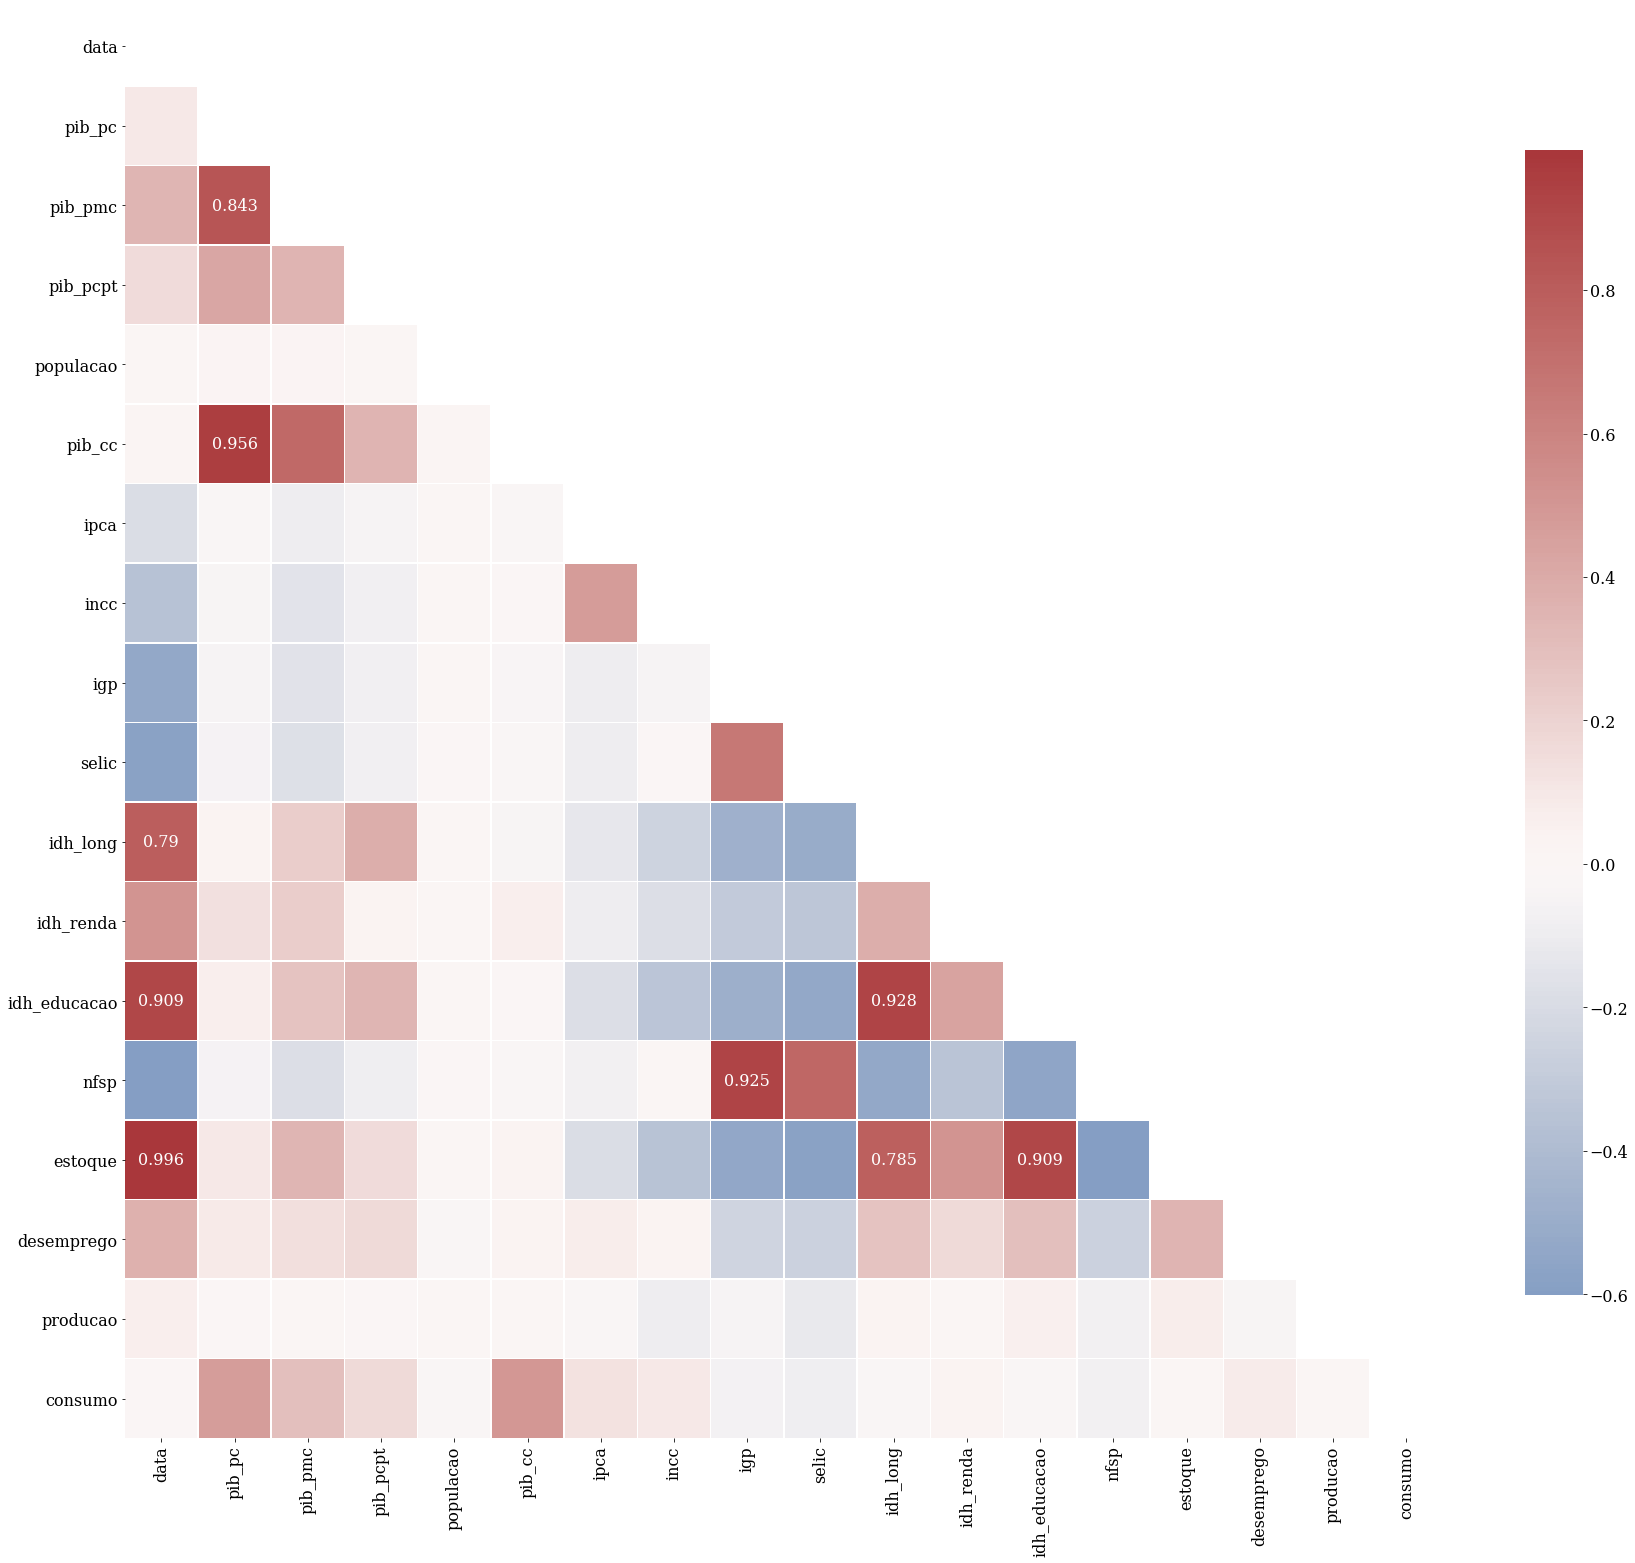

In [294]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 3), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(25, 22))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [295]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

data          estoque         0.995768
pib_pc        pib_cc          0.955945
idh_long      idh_educacao    0.927717
igp           nfsp            0.924957
data          idh_educacao    0.909420
idh_educacao  estoque         0.909110
pib_pc        pib_pmc         0.843445
data          idh_long        0.790454
idh_long      estoque         0.784846
selic         nfsp            0.749377
pib_pmc       pib_cc          0.734325
dtype: float64

In [296]:
df["producao"] = df["producao"].fillna(0)

In [297]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import tensorflow as tf
sns.set_palette("Set2")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [298]:
# calcula metricas de regressao
def score_regression_metrics(y_test, y_test_pred):

    RMSE = mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)
    MAE = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
    MAPE = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
    R2 = r2_score(y_true=y_test, y_pred=y_test_pred)

    scores = {
        "neg_root_mean_squared_error": RMSE,
        "neg_mean_absolute_error": MAE,
        "neg_mean_absolute_percentage_error": MAPE,
    }

    return scores

def show_scores (scores):

    print ("Scores obtidos:")

    print (f"RMSE: {scores['neg_root_mean_squared_error']}")
    print (f"MAE: {scores['neg_mean_absolute_error']}")
    print (f"MAPE: {scores['neg_mean_absolute_percentage_error']}")

In [299]:
import numpy as np

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

# Regressão Linear

In [304]:
x = df.drop(["data", "consumo", "producao"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [305]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: -1.197662295463041


In [306]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 269332.6196912548
MAE: 190233.0898362689
MAPE: 3.3503208914971068


In [247]:
x = df.drop(["data", "consumo", "producao"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [248]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.928603270712656


In [249]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 47822.883532378735
MAE: 33914.67203311545
MAPE: 0.7379948670381883


In [250]:
x = df.drop(["data", "consumo"], axis=1).copy()

# processo de one-hot
x = pd.get_dummies(data=x, columns=["estados"], drop_first=True)

# aqui só precisamos do valor do consumo em si 
y = df[["consumo"]].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

In [251]:
regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.9286169929147857


In [252]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 47818.28761590349
MAE: 33817.86092409893
MAPE: 0.7333113936051321


In [300]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)

# calcula media e desvio padrao do treino e normaliza os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

regr = LinearRegression()

regr.fit(x_train, y_train)

print(f"Score: {regr.score(x_test, y_test)}")

Score: 0.928616992663406


In [301]:
y_pred = regr.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 33270.24797246363
MAE: 20058.92487559305
MAPE: 0.3550854085554814


In [302]:
y_pred = regr.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 47818.287700101035
MAE: 33817.86094384812
MAPE: 0.7333113932757398


# LSTM

In [236]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=32, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [237]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [239]:
batch_size = 32
epochs = 200
verbose = 1
timesteps = 7

In [240]:
x, y = split_sequences(df.drop(["estados", "data", "producao"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
147/147 [==============================] - 2s 3ms/step - loss: 138930028544000.0000 - RMSE: 11786858.0000
Epoch 2/200
147/147 [==============================] - 0s 3ms/step - loss: 20059279851520.0000 - RMSE: 4478758.5000
Epoch 3/200
147/147 [==============================] - 1s 3ms/step - loss: 11018400956416.0000 - RMSE: 3319397.7500
Epoch 4/200
147/147 [==============================] - 1s 3ms/step - loss: 4109909360640.0000 - RMSE: 2027291.1250
Epoch 5/200
147/147 [==============================] - 1s 3ms/step - loss: 2148496572416.0000 - RMSE: 1465775.1250
Epoch 6/200
147/147 [==============================] - 1s 4ms/step - loss: 946086936576.0000 - RMSE: 972670.0000
Epoch 7/200
147/147 [==============================] - 1s 5ms/step - loss: 317668261888.0000 - RMSE: 563620.6875
Epoch 8/200
147/147 [==============================] - 1s 6ms/step - loss: 233187573760.0000 - RMSE: 482895.0000
Epoch 9/200
147/147 [==============================] - 1s 6ms/step - loss: 226402

147/147 [==============================] - 1s 8ms/step - loss: 29082458112.0000 - RMSE: 170535.7969
Epoch 74/200
147/147 [==============================] - 1s 6ms/step - loss: 30200471552.0000 - RMSE: 173782.8281
Epoch 75/200
147/147 [==============================] - 1s 5ms/step - loss: 29426483200.0000 - RMSE: 171541.4844
Epoch 76/200
147/147 [==============================] - 0s 3ms/step - loss: 29146693632.0000 - RMSE: 170724.0312
Epoch 77/200
147/147 [==============================] - 0s 3ms/step - loss: 28685168640.0000 - RMSE: 169366.9688
Epoch 78/200
147/147 [==============================] - 0s 3ms/step - loss: 28533645312.0000 - RMSE: 168919.0469
Epoch 79/200
147/147 [==============================] - 0s 3ms/step - loss: 28250800128.0000 - RMSE: 168079.7500
Epoch 80/200
147/147 [==============================] - 0s 3ms/step - loss: 28142460928.0000 - RMSE: 167757.1562
Epoch 81/200
147/147 [==============================] - 0s 2ms/step - loss: 27654213632.0000 - RMSE: 166295.5

147/147 [==============================] - 1s 5ms/step - loss: 20920891392.0000 - RMSE: 144640.5625
Epoch 146/200
147/147 [==============================] - 1s 6ms/step - loss: 30757904384.0000 - RMSE: 175379.3125
Epoch 147/200
147/147 [==============================] - 1s 5ms/step - loss: 30130180096.0000 - RMSE: 173580.4688
Epoch 148/200
147/147 [==============================] - 1s 5ms/step - loss: 31393224704.0000 - RMSE: 177181.3281
Epoch 149/200
147/147 [==============================] - 1s 6ms/step - loss: 30537418752.0000 - RMSE: 174749.5938
Epoch 150/200
147/147 [==============================] - 1s 5ms/step - loss: 30818723840.0000 - RMSE: 175552.6250
Epoch 151/200
147/147 [==============================] - 1s 5ms/step - loss: 32056784896.0000 - RMSE: 179044.0938
Epoch 152/200
147/147 [==============================] - 1s 6ms/step - loss: 28282281984.0000 - RMSE: 168173.3750
Epoch 153/200
147/147 [==============================] - 1s 7ms/step - loss: 17845524480.0000 - RMSE: 

In [241]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 111076.72121753548
MAE: 86004.528869731
MAPE: 2.4549526970614144


In [242]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 156819.7996461969
MAE: 115397.11250567494
MAPE: 3.403544847158364


In [244]:
x, y = split_sequences(df.drop(["estados", "data", "producao"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
147/147 [==============================] - 1s 3ms/step - loss: 71059349504.0000 - RMSE: 266569.5938
Epoch 2/200
147/147 [==============================] - 0s 3ms/step - loss: 45754195968.0000 - RMSE: 213902.3125
Epoch 3/200
147/147 [==============================] - 0s 3ms/step - loss: 41871847424.0000 - RMSE: 204626.1094
Epoch 4/200
147/147 [==============================] - 0s 3ms/step - loss: 39409221632.0000 - RMSE: 198517.5625
Epoch 5/200
147/147 [==============================] - 1s 4ms/step - loss: 37689307136.0000 - RMSE: 194137.3438
Epoch 6/200
147/147 [==============================] - 1s 4ms/step - loss: 35137671168.0000 - RMSE: 187450.4531
Epoch 7/200
147/147 [==============================] - 1s 4ms/step - loss: 32098736128.0000 - RMSE: 179161.2031
Epoch 8/200
147/147 [==============================] - 1s 5ms/step - loss: 28235534336.0000 - RMSE: 168034.3281
Epoch 9/200
147/147 [==============================] - 1s 5ms/step - loss: 22409789440.0000 - RMSE: 1496

147/147 [==============================] - 1s 4ms/step - loss: 2243102208.0000 - RMSE: 47361.3984
Epoch 75/200
147/147 [==============================] - 1s 4ms/step - loss: 2320045824.0000 - RMSE: 48166.8555
Epoch 76/200
147/147 [==============================] - 1s 6ms/step - loss: 2509108224.0000 - RMSE: 50091.0000
Epoch 77/200
147/147 [==============================] - 1s 6ms/step - loss: 2615650304.0000 - RMSE: 51143.4297
Epoch 78/200
147/147 [==============================] - 1s 6ms/step - loss: 2267308032.0000 - RMSE: 47616.2578
Epoch 79/200
147/147 [==============================] - 1s 7ms/step - loss: 2135880192.0000 - RMSE: 46215.5820
Epoch 80/200
147/147 [==============================] - 1s 6ms/step - loss: 22138894336.0000 - RMSE: 148791.4531
Epoch 81/200
147/147 [==============================] - 1s 5ms/step - loss: 22107897856.0000 - RMSE: 148687.2500
Epoch 82/200
147/147 [==============================] - 1s 6ms/step - loss: 12635102208.0000 - RMSE: 112405.9688
Epoch 83

147/147 [==============================] - 1s 6ms/step - loss: 2304847872.0000 - RMSE: 48008.8320
Epoch 148/200
147/147 [==============================] - 1s 6ms/step - loss: 2225696000.0000 - RMSE: 47177.2812
Epoch 149/200
147/147 [==============================] - 1s 6ms/step - loss: 1964954240.0000 - RMSE: 44327.8047
Epoch 150/200
147/147 [==============================] - 1s 5ms/step - loss: 1959017088.0000 - RMSE: 44260.7852
Epoch 151/200
147/147 [==============================] - 1s 5ms/step - loss: 2093105280.0000 - RMSE: 45750.4688
Epoch 152/200
147/147 [==============================] - 1s 6ms/step - loss: 1844862208.0000 - RMSE: 42951.8594
Epoch 153/200
147/147 [==============================] - 1s 7ms/step - loss: 1995700864.0000 - RMSE: 44673.2695
Epoch 154/200
147/147 [==============================] - 1s 5ms/step - loss: 1863758464.0000 - RMSE: 43171.2695
Epoch 155/200
147/147 [==============================] - 1s 5ms/step - loss: 2337370112.0000 - RMSE: 48346.3555
Epoch 

In [245]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 28009.365608896856
MAE: 18403.48415795293
MAPE: 0.34402007365023457


In [246]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 76185.18056291105
MAE: 43975.14572298729
MAPE: 0.6652359140007931


In [148]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [149]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 484654383104.0000 - RMSE: 696171.2500
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 427032510464.0000 - RMSE: 653477.2500
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 404712488960.0000 - RMSE: 636170.1875
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 383976570880.0000 - RMSE: 619658.4375
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 355405168640.0000 - RMSE: 596158.6875
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 320691208192.0000 - RMSE: 566296.0625
Epoch 7/200
250/250 [==============================] - 1s 6ms/step - loss: 268210946048.0000 - RMSE: 517890.8750
Epoch 8/200
250/250 [==============================] - 1s 6ms/step - loss: 255272599552.0000 - RMSE: 505245.0938
Epoch 9/200
250/250 [==============================] - 2s 6ms/step - loss: 200012546048.0000 - R

250/250 [==============================] - 2s 6ms/step - loss: 9281321984.0000 - RMSE: 96339.6172
Epoch 74/200
250/250 [==============================] - 1s 6ms/step - loss: 8841227264.0000 - RMSE: 94027.7969
Epoch 75/200
250/250 [==============================] - 1s 6ms/step - loss: 10314344448.0000 - RMSE: 101559.5625
Epoch 76/200
250/250 [==============================] - 1s 5ms/step - loss: 13460517888.0000 - RMSE: 116019.4688
Epoch 77/200
250/250 [==============================] - 1s 5ms/step - loss: 8223062016.0000 - RMSE: 90681.1016
Epoch 78/200
250/250 [==============================] - 1s 5ms/step - loss: 7123693056.0000 - RMSE: 84401.9766
Epoch 79/200
250/250 [==============================] - 1s 5ms/step - loss: 5892234240.0000 - RMSE: 76760.8906
Epoch 80/200
250/250 [==============================] - 1s 5ms/step - loss: 6205147136.0000 - RMSE: 78772.7578
Epoch 81/200
250/250 [==============================] - 1s 5ms/step - loss: 7207282688.0000 - RMSE: 84895.7188
Epoch 82/2

250/250 [==============================] - 1s 5ms/step - loss: 4772924416.0000 - RMSE: 69086.3516
Epoch 147/200
250/250 [==============================] - 2s 6ms/step - loss: 4514267136.0000 - RMSE: 67188.2969
Epoch 148/200
250/250 [==============================] - 2s 6ms/step - loss: 4608059392.0000 - RMSE: 67882.6875
Epoch 149/200
250/250 [==============================] - 1s 6ms/step - loss: 4522255360.0000 - RMSE: 67247.7188
Epoch 150/200
250/250 [==============================] - 1s 6ms/step - loss: 5723756544.0000 - RMSE: 75655.5156
Epoch 151/200
250/250 [==============================] - 1s 5ms/step - loss: 5183441408.0000 - RMSE: 71996.1172
Epoch 152/200
250/250 [==============================] - 1s 6ms/step - loss: 5150305280.0000 - RMSE: 71765.6250
Epoch 153/200
250/250 [==============================] - 1s 6ms/step - loss: 5884886016.0000 - RMSE: 76713.0078
Epoch 154/200
250/250 [==============================] - 1s 5ms/step - loss: 4533416448.0000 - RMSE: 67330.6484
Epoch 

In [150]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 39939.70136690292
MAE: 21180.724180525358
MAPE: 5.949600310338945e+16


In [151]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 71632.9870342858
MAE: 50577.47313206449
MAPE: 0.7921270312075205


In [217]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 6ms/step - loss: 489790275584.0000 - RMSE: 699850.1875
Epoch 2/500
250/250 [==============================] - 1s 5ms/step - loss: 436306313216.0000 - RMSE: 660534.8750
Epoch 3/500
250/250 [==============================] - 2s 6ms/step - loss: 419660464128.0000 - RMSE: 647812.0625
Epoch 4/500
250/250 [==============================] - 2s 6ms/step - loss: 408959975424.0000 - RMSE: 639499.8125
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 392973582336.0000 - RMSE: 626876.0625
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 377813467136.0000 - RMSE: 614665.3125
Epoch 7/500
250/250 [==============================] - 1s 6ms/step - loss: 354480586752.0000 - RMSE: 595382.7500
Epoch 8/500
250/250 [==============================] - 1s 5ms/step - loss: 328297971712.0000 - RMSE: 572972.9375
Epoch 9/500
250/250 [==============================] - 1s 5ms/step - loss: 302379630592.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 4449926656.0000 - RMSE: 66707.7734
Epoch 147/500
250/250 [==============================] - 1s 5ms/step - loss: 4272604416.0000 - RMSE: 65365.1602
Epoch 148/500
250/250 [==============================] - 1s 5ms/step - loss: 4081779200.0000 - RMSE: 63888.8047
Epoch 149/500
250/250 [==============================] - 2s 6ms/step - loss: 3975964928.0000 - RMSE: 63055.2539
Epoch 150/500
250/250 [==============================] - 2s 6ms/step - loss: 3565021696.0000 - RMSE: 59707.8008
Epoch 151/500
250/250 [==============================] - 2s 7ms/step - loss: 3284310528.0000 - RMSE: 57308.9062
Epoch 152/500
250/250 [==============================] - 2s 6ms/step - loss: 4053565696.0000 - RMSE: 63667.6172
Epoch 153/500
250/250 [==============================] - 2s 6ms/step - loss: 4779565568.0000 - RMSE: 69134.3984
Epoch 154/500
250/250 [==============================] - 2s 6ms/step - loss: 3567268096.0000 - RMSE: 59726.6094
Epoch 

250/250 [==============================] - 1s 4ms/step - loss: 2698030592.0000 - RMSE: 51942.5703
Epoch 293/500
250/250 [==============================] - 1s 4ms/step - loss: 2773118208.0000 - RMSE: 52660.4062
Epoch 294/500
250/250 [==============================] - 1s 3ms/step - loss: 2455344896.0000 - RMSE: 49551.4375
Epoch 295/500
250/250 [==============================] - 1s 3ms/step - loss: 2473313280.0000 - RMSE: 49732.4180
Epoch 296/500
250/250 [==============================] - 1s 5ms/step - loss: 2497347840.0000 - RMSE: 49973.4727
Epoch 297/500
250/250 [==============================] - 1s 5ms/step - loss: 2818541824.0000 - RMSE: 53089.9414
Epoch 298/500
250/250 [==============================] - 1s 4ms/step - loss: 2885265664.0000 - RMSE: 53714.6680
Epoch 299/500
250/250 [==============================] - 1s 4ms/step - loss: 2602703104.0000 - RMSE: 51016.6953
Epoch 300/500
250/250 [==============================] - 1s 4ms/step - loss: 2215704832.0000 - RMSE: 47071.2734
Epoch 

250/250 [==============================] - 1s 3ms/step - loss: 2628225792.0000 - RMSE: 51266.2266
Epoch 439/500
250/250 [==============================] - 1s 5ms/step - loss: 2674292224.0000 - RMSE: 51713.5586
Epoch 440/500
250/250 [==============================] - 2s 8ms/step - loss: 2720480512.0000 - RMSE: 52158.2266
Epoch 441/500
250/250 [==============================] - 2s 8ms/step - loss: 2080488576.0000 - RMSE: 45612.3750
Epoch 442/500
250/250 [==============================] - 1s 4ms/step - loss: 2359625984.0000 - RMSE: 48575.9805
Epoch 443/500
250/250 [==============================] - 1s 5ms/step - loss: 2225221888.0000 - RMSE: 47172.2578
Epoch 444/500
250/250 [==============================] - 1s 5ms/step - loss: 1585003008.0000 - RMSE: 39812.0977
Epoch 445/500
250/250 [==============================] - 1s 5ms/step - loss: 2133366528.0000 - RMSE: 46188.3828
Epoch 446/500
250/250 [==============================] - 1s 5ms/step - loss: 1985054208.0000 - RMSE: 44553.9453
Epoch 

In [218]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 27444.06026052622
MAE: 14565.83703824177
MAPE: 1.6945379875649548e+16


In [219]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 85205.9171621067
MAE: 58804.423891151375
MAPE: 0.9006612572314762


In [220]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [221]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=200, verbose=verbose)

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 518333267968.0000 - RMSE: 719953.6875
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 518197116928.0000 - RMSE: 719859.1250
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 513545338880.0000 - RMSE: 716620.7500
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 492222054400.0000 - RMSE: 701585.3750
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 473145573376.0000 - RMSE: 687855.7500
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 463166308352.0000 - RMSE: 680563.2500
Epoch 7/200
250/250 [==============================] - 1s 5ms/step - loss: 456254128128.0000 - RMSE: 675465.8750
Epoch 8/200
250/250 [==============================] - 1s 3ms/step - loss: 450742845440.0000 - RMSE: 671373.8750
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 446972133376.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 86673760256.0000 - RMSE: 294404.0625
Epoch 144/200
250/250 [==============================] - 1s 6ms/step - loss: 77463748608.0000 - RMSE: 278323.0938
Epoch 145/200
250/250 [==============================] - 1s 5ms/step - loss: 76323782656.0000 - RMSE: 276267.5938
Epoch 146/200
250/250 [==============================] - 1s 5ms/step - loss: 80437272576.0000 - RMSE: 283614.6562
Epoch 147/200
250/250 [==============================] - 1s 5ms/step - loss: 79822651392.0000 - RMSE: 282529.0312
Epoch 148/200
250/250 [==============================] - 1s 5ms/step - loss: 77140393984.0000 - RMSE: 277741.5938
Epoch 149/200
250/250 [==============================] - 1s 5ms/step - loss: 70776651776.0000 - RMSE: 266038.8125
Epoch 150/200
250/250 [==============================] - 1s 5ms/step - loss: 70000779264.0000 - RMSE: 264576.5938
Epoch 151/200
250/250 [==============================] - 1s 5ms/step - loss: 67736170496.0000 - RMSE: 

In [222]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173591.08491016354
MAE: 105235.64959673437
MAPE: 8.922061611803074e+16


In [223]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 209907.96232000104
MAE: 133273.3570319426
MAPE: 1.2125902418427619


In [224]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=500, verbose=verbose)

Epoch 1/500
250/250 [==============================] - 2s 5ms/step - loss: 518333169664.0000 - RMSE: 719953.5625
Epoch 2/500
250/250 [==============================] - 1s 6ms/step - loss: 518178013184.0000 - RMSE: 719845.8125
Epoch 3/500
250/250 [==============================] - 2s 7ms/step - loss: 513004699648.0000 - RMSE: 716243.4375
Epoch 4/500
250/250 [==============================] - 2s 7ms/step - loss: 489600188416.0000 - RMSE: 699714.3750
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 468697939968.0000 - RMSE: 684615.1875
Epoch 6/500
250/250 [==============================] - 1s 6ms/step - loss: 458670112768.0000 - RMSE: 677251.8750
Epoch 7/500
250/250 [==============================] - 1s 5ms/step - loss: 452047601664.0000 - RMSE: 672344.8750
Epoch 8/500
250/250 [==============================] - 1s 6ms/step - loss: 446981242880.0000 - RMSE: 668566.5625
Epoch 9/500
250/250 [==============================] - 2s 6ms/step - loss: 443545485312.0000 - R

250/250 [==============================] - 1s 5ms/step - loss: 71769628672.0000 - RMSE: 267898.5312
Epoch 144/500
250/250 [==============================] - 1s 5ms/step - loss: 69084831744.0000 - RMSE: 262839.9375
Epoch 145/500
250/250 [==============================] - 1s 5ms/step - loss: 68816388096.0000 - RMSE: 262328.7812
Epoch 146/500
250/250 [==============================] - 1s 5ms/step - loss: 67300077568.0000 - RMSE: 259422.5781
Epoch 147/500
250/250 [==============================] - 1s 4ms/step - loss: 66399215616.0000 - RMSE: 257680.4531
Epoch 148/500
250/250 [==============================] - 1s 5ms/step - loss: 64333385728.0000 - RMSE: 253640.2656
Epoch 149/500
250/250 [==============================] - 1s 5ms/step - loss: 83092406272.0000 - RMSE: 288257.5312
Epoch 150/500
250/250 [==============================] - 1s 5ms/step - loss: 65637933056.0000 - RMSE: 256199.0156
Epoch 151/500
250/250 [==============================] - 1s 4ms/step - loss: 62600790016.0000 - RMSE: 

Epoch 286/500
250/250 [==============================] - 1s 4ms/step - loss: 12825832448.0000 - RMSE: 113251.1953
Epoch 287/500
250/250 [==============================] - 1s 4ms/step - loss: 12751882240.0000 - RMSE: 112924.2344
Epoch 288/500
250/250 [==============================] - 1s 5ms/step - loss: 12993287168.0000 - RMSE: 113988.1016
Epoch 289/500
250/250 [==============================] - 1s 5ms/step - loss: 12175379456.0000 - RMSE: 110342.1016
Epoch 290/500
250/250 [==============================] - 1s 5ms/step - loss: 12652208128.0000 - RMSE: 112482.0312
Epoch 291/500
250/250 [==============================] - 1s 5ms/step - loss: 12265178112.0000 - RMSE: 110748.2656
Epoch 292/500
250/250 [==============================] - 1s 5ms/step - loss: 13087073280.0000 - RMSE: 114398.7500
Epoch 293/500
250/250 [==============================] - 1s 5ms/step - loss: 12427768832.0000 - RMSE: 111479.9062
Epoch 294/500
250/250 [==============================] - 1s 5ms/step - loss: 12316788736

250/250 [==============================] - 1s 6ms/step - loss: 5664893952.0000 - RMSE: 75265.4922
Epoch 432/500
250/250 [==============================] - 1s 6ms/step - loss: 5646858752.0000 - RMSE: 75145.5859
Epoch 433/500
250/250 [==============================] - 1s 6ms/step - loss: 5938541568.0000 - RMSE: 77061.9297
Epoch 434/500
250/250 [==============================] - 2s 8ms/step - loss: 5307229184.0000 - RMSE: 72850.7344
Epoch 435/500
250/250 [==============================] - 2s 6ms/step - loss: 5231296000.0000 - RMSE: 72327.6953
Epoch 436/500
250/250 [==============================] - 2s 7ms/step - loss: 5348545536.0000 - RMSE: 73133.7500
Epoch 437/500
250/250 [==============================] - 1s 5ms/step - loss: 4880258048.0000 - RMSE: 69858.8438
Epoch 438/500
250/250 [==============================] - 2s 6ms/step - loss: 4827506176.0000 - RMSE: 69480.2578
Epoch 439/500
250/250 [==============================] - 1s 6ms/step - loss: 4707738624.0000 - RMSE: 68612.9609
Epoch 

In [225]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 54140.277435541015
MAE: 36542.333513401805
MAPE: 1.4856954434528378e+17


In [226]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 173818.91460540035
MAE: 94696.61034532913
MAPE: 0.9633608166949036


In [203]:
df = df[df["data"] >= 200301]

In [206]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [207]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=128, epochs=200, verbose=verbose)

Epoch 1/200
37/37 [==============================] - 1s 14ms/step - loss: 71641956352.0000 - RMSE: 267660.1562
Epoch 2/200
37/37 [==============================] - 1s 15ms/step - loss: 67819888640.0000 - RMSE: 260422.5156
Epoch 3/200
37/37 [==============================] - 1s 16ms/step - loss: 45620252672.0000 - RMSE: 213588.9844
Epoch 4/200
37/37 [==============================] - 1s 15ms/step - loss: 39509667840.0000 - RMSE: 198770.3906
Epoch 5/200
37/37 [==============================] - 1s 15ms/step - loss: 36756713472.0000 - RMSE: 191720.4062
Epoch 6/200
37/37 [==============================] - 1s 15ms/step - loss: 34536841216.0000 - RMSE: 185840.9062
Epoch 7/200
37/37 [==============================] - 1s 20ms/step - loss: 32107802624.0000 - RMSE: 179186.5000
Epoch 8/200
37/37 [==============================] - 1s 19ms/step - loss: 28758503424.0000 - RMSE: 169583.3281
Epoch 9/200
37/37 [==============================] - 1s 17ms/step - loss: 25787506688.0000 - RMSE: 160584.8906
E

37/37 [==============================] - 1s 18ms/step - loss: 1308273152.0000 - RMSE: 36170.0586
Epoch 76/200
37/37 [==============================] - 1s 21ms/step - loss: 1458665728.0000 - RMSE: 38192.4844
Epoch 77/200
37/37 [==============================] - 1s 20ms/step - loss: 1402368000.0000 - RMSE: 37448.2031
Epoch 78/200
37/37 [==============================] - 1s 19ms/step - loss: 1514295936.0000 - RMSE: 38913.9570
Epoch 79/200
37/37 [==============================] - 1s 19ms/step - loss: 1483782272.0000 - RMSE: 38519.8945
Epoch 80/200
37/37 [==============================] - 1s 17ms/step - loss: 1423504640.0000 - RMSE: 37729.3594
Epoch 81/200
37/37 [==============================] - 1s 16ms/step - loss: 1243907072.0000 - RMSE: 35269.0664
Epoch 82/200
37/37 [==============================] - 1s 18ms/step - loss: 1487732096.0000 - RMSE: 38571.1289
Epoch 83/200
37/37 [==============================] - 1s 20ms/step - loss: 1397144704.0000 - RMSE: 37378.3984
Epoch 84/200
37/37 [===

37/37 [==============================] - 1s 21ms/step - loss: 1176303360.0000 - RMSE: 34297.2773
Epoch 150/200
37/37 [==============================] - 1s 19ms/step - loss: 1192279808.0000 - RMSE: 34529.4062
Epoch 151/200
37/37 [==============================] - 1s 17ms/step - loss: 1260185856.0000 - RMSE: 35499.0977
Epoch 152/200
37/37 [==============================] - 1s 18ms/step - loss: 1330657536.0000 - RMSE: 36478.1797
Epoch 153/200
37/37 [==============================] - 1s 18ms/step - loss: 1143692032.0000 - RMSE: 33818.5156
Epoch 154/200
37/37 [==============================] - 1s 18ms/step - loss: 1046953984.0000 - RMSE: 32356.6680
Epoch 155/200
37/37 [==============================] - 1s 19ms/step - loss: 1185252608.0000 - RMSE: 34427.4961
Epoch 156/200
37/37 [==============================] - 1s 16ms/step - loss: 1537636864.0000 - RMSE: 39212.7148
Epoch 157/200
37/37 [==============================] - 1s 18ms/step - loss: 1283536384.0000 - RMSE: 35826.4766
Epoch 158/200
3

In [208]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 23936.411232914095
MAE: 12891.130813695663
MAPE: 0.13885591395906058


In [209]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 46003.17349996378
MAE: 29785.483820511123
MAPE: 0.40046101113814014


In [51]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [52]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 3s 10ms/step - loss: 468517486592.0000 - RMSE: 684483.3750
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 408049680384.0000 - RMSE: 638787.6875
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 318980030464.0000 - RMSE: 564783.1875
Epoch 4/200
125/125 [==============================] - 1s 10ms/step - loss: 221313024000.0000 - RMSE: 470439.1875
Epoch 5/200
125/125 [==============================] - 2s 12ms/step - loss: 172701122560.0000 - RMSE: 415573.2500
Epoch 6/200
125/125 [==============================] - 1s 11ms/step - loss: 175329771520.0000 - RMSE: 418723.9688
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 186418315264.0000 - RMSE: 431761.8750
Epoch 8/200
125/125 [==============================] - 1s 10ms/step - loss: 119967948800.0000 - RMSE: 346363.9062
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 42101235712.

125/125 [==============================] - 1s 12ms/step - loss: 12972904448.0000 - RMSE: 113898.6562
Epoch 74/200
125/125 [==============================] - 1s 12ms/step - loss: 10766332928.0000 - RMSE: 103760.9375
Epoch 75/200
125/125 [==============================] - 1s 12ms/step - loss: 12826271744.0000 - RMSE: 113253.1328
Epoch 76/200
125/125 [==============================] - 1s 12ms/step - loss: 11811935232.0000 - RMSE: 108682.7266
Epoch 77/200
125/125 [==============================] - 2s 12ms/step - loss: 10799249408.0000 - RMSE: 103919.4375
Epoch 78/200
125/125 [==============================] - 1s 12ms/step - loss: 12395823104.0000 - RMSE: 111336.5312
Epoch 79/200
125/125 [==============================] - 2s 12ms/step - loss: 21207566336.0000 - RMSE: 145628.1719
Epoch 80/200
125/125 [==============================] - 1s 12ms/step - loss: 12691372032.0000 - RMSE: 112655.9922
Epoch 81/200
125/125 [==============================] - 1s 12ms/step - loss: 14347568128.0000 - RMSE:

In [ ]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

In [ ]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

In [310]:
df = df[df["data"] >= 200301]

In [311]:
from sklearn.preprocessing import RobustScaler

In [312]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = RobustScaler()

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [313]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [314]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
74/74 [==============================] - 3s 23ms/step - loss: 66604376064.0000 - RMSE: 258078.2344
Epoch 2/200
74/74 [==============================] - 2s 25ms/step - loss: 49377792000.0000 - RMSE: 222211.1406
Epoch 3/200
74/74 [==============================] - 2s 26ms/step - loss: 42396282880.0000 - RMSE: 205903.5781
Epoch 4/200
74/74 [==============================] - 2s 21ms/step - loss: 36176781312.0000 - RMSE: 190201.9531
Epoch 5/200
74/74 [==============================] - 2s 23ms/step - loss: 26631215104.0000 - RMSE: 163190.7344
Epoch 6/200
74/74 [==============================] - 2s 23ms/step - loss: 17866872832.0000 - RMSE: 133667.0156
Epoch 7/200
74/74 [==============================] - 2s 21ms/step - loss: 9782617088.0000 - RMSE: 98907.1172
Epoch 8/200
74/74 [==============================] - 2s 23ms/step - loss: 8369640448.0000 - RMSE: 91485.7422
Epoch 9/200
74/74 [==============================] - 2s 23ms/step - loss: 7197683712.0000 - RMSE: 84839.1641
Epoch 1

74/74 [==============================] - 2s 22ms/step - loss: 1432301440.0000 - RMSE: 37845.7578
Epoch 76/200
74/74 [==============================] - 2s 22ms/step - loss: 1663391872.0000 - RMSE: 40784.7031
Epoch 77/200
74/74 [==============================] - 2s 21ms/step - loss: 1713998720.0000 - RMSE: 41400.4688
Epoch 78/200
74/74 [==============================] - 2s 25ms/step - loss: 1715772544.0000 - RMSE: 41421.8867
Epoch 79/200
74/74 [==============================] - 2s 25ms/step - loss: 1629195520.0000 - RMSE: 40363.2930
Epoch 80/200
74/74 [==============================] - 2s 25ms/step - loss: 1572709888.0000 - RMSE: 39657.4062
Epoch 81/200
74/74 [==============================] - 2s 22ms/step - loss: 1897403392.0000 - RMSE: 43559.1953
Epoch 82/200
74/74 [==============================] - 2s 25ms/step - loss: 1619732352.0000 - RMSE: 40245.8984
Epoch 83/200
74/74 [==============================] - 2s 22ms/step - loss: 1757638912.0000 - RMSE: 41924.2031
Epoch 84/200
74/74 [===

74/74 [==============================] - 1s 20ms/step - loss: 1799805568.0000 - RMSE: 42424.1172
Epoch 150/200
74/74 [==============================] - 2s 22ms/step - loss: 1242180224.0000 - RMSE: 35244.5781
Epoch 151/200
74/74 [==============================] - 2s 22ms/step - loss: 1485029760.0000 - RMSE: 38536.0820
Epoch 152/200
74/74 [==============================] - 2s 23ms/step - loss: 1321842816.0000 - RMSE: 36357.1562
Epoch 153/200
74/74 [==============================] - 1s 20ms/step - loss: 1520798208.0000 - RMSE: 38997.4141
Epoch 154/200
74/74 [==============================] - 2s 23ms/step - loss: 1441013248.0000 - RMSE: 37960.6797
Epoch 155/200
74/74 [==============================] - 2s 22ms/step - loss: 1299843328.0000 - RMSE: 36053.3398
Epoch 156/200
74/74 [==============================] - 2s 22ms/step - loss: 1305006720.0000 - RMSE: 36124.8750
Epoch 157/200
74/74 [==============================] - 2s 22ms/step - loss: 1480823936.0000 - RMSE: 38481.4766
Epoch 158/200
7

In [315]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 18529.19469691914
MAE: 11252.454873383116
MAPE: 0.13347795049230984


In [316]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 78197.26384677648
MAE: 40054.330308669414
MAPE: 0.419750536188523


In [ ]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [66]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 504590860288.0000 - RMSE: 710345.5625
Epoch 2/300
125/125 [==============================] - 1s 12ms/step - loss: 448219742208.0000 - RMSE: 669492.1250
Epoch 3/300
125/125 [==============================] - 2s 12ms/step - loss: 411076952064.0000 - RMSE: 641152.8125
Epoch 4/300
125/125 [==============================] - 1s 10ms/step - loss: 367788883968.0000 - RMSE: 606456.0000
Epoch 5/300
125/125 [==============================] - 1s 10ms/step - loss: 319203639296.0000 - RMSE: 564981.1250
Epoch 6/300
125/125 [==============================] - 2s 12ms/step - loss: 281854410752.0000 - RMSE: 530899.6250
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 245528100864.0000 - RMSE: 495507.9375
Epoch 8/300
125/125 [==============================] - 1s 12ms/step - loss: 201638199296.0000 - RMSE: 449041.4375
Epoch 9/300
125/125 [==============================] - 1s 9ms/step - loss: 160944979968.0

125/125 [==============================] - 1s 12ms/step - loss: 7377947136.0000 - RMSE: 85894.9766
Epoch 146/300
125/125 [==============================] - 1s 10ms/step - loss: 7470169088.0000 - RMSE: 86430.1406
Epoch 147/300
125/125 [==============================] - 1s 11ms/step - loss: 8591126528.0000 - RMSE: 92688.3281
Epoch 148/300
125/125 [==============================] - 1s 11ms/step - loss: 7264453632.0000 - RMSE: 85231.7656
Epoch 149/300
125/125 [==============================] - 1s 10ms/step - loss: 7011591168.0000 - RMSE: 83735.2422
Epoch 150/300
125/125 [==============================] - 1s 10ms/step - loss: 8056657408.0000 - RMSE: 89758.8828
Epoch 151/300
125/125 [==============================] - 1s 11ms/step - loss: 7979918848.0000 - RMSE: 89330.3906
Epoch 152/300
125/125 [==============================] - 1s 10ms/step - loss: 8862637056.0000 - RMSE: 94141.5781
Epoch 153/300
125/125 [==============================] - 1s 10ms/step - loss: 7255436800.0000 - RMSE: 85178.85

125/125 [==============================] - 1s 8ms/step - loss: 8146391040.0000 - RMSE: 90257.3594
Epoch 290/300
125/125 [==============================] - 1s 9ms/step - loss: 7833931776.0000 - RMSE: 88509.5000
Epoch 291/300
125/125 [==============================] - 2s 12ms/step - loss: 7719895040.0000 - RMSE: 87862.9297
Epoch 292/300
125/125 [==============================] - 2s 12ms/step - loss: 7258244096.0000 - RMSE: 85195.3281
Epoch 293/300
125/125 [==============================] - 1s 11ms/step - loss: 7487520256.0000 - RMSE: 86530.4609
Epoch 294/300
125/125 [==============================] - 2s 13ms/step - loss: 8400339968.0000 - RMSE: 91653.3672
Epoch 295/300
125/125 [==============================] - 2s 14ms/step - loss: 6778018816.0000 - RMSE: 82328.7266
Epoch 296/300
125/125 [==============================] - 1s 11ms/step - loss: 6917691392.0000 - RMSE: 83172.6562
Epoch 297/300
125/125 [==============================] - 1s 11ms/step - loss: 7531008000.0000 - RMSE: 86781.3828

In [67]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 64743.64517874937
MAE: 39225.6320961278
MAPE: 1.2366986520657118e+17


In [68]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 66886.09963027056
MAE: 49132.21985677083
MAPE: 1.039925971916201


In [69]:
from sklearn.preprocessing import QuantileTransformer

In [70]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = QuantileTransformer(output_distribution='normal', random_state=0)


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [75]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [76]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=300, verbose=verbose, callbacks=[rlrop])

Epoch 1/300
125/125 [==============================] - 2s 9ms/step - loss: 443173994496.0000 - RMSE: 665713.1250
Epoch 2/300
125/125 [==============================] - 2s 12ms/step - loss: 348883812352.0000 - RMSE: 590663.8750
Epoch 3/300
125/125 [==============================] - 1s 12ms/step - loss: 254922113024.0000 - RMSE: 504898.1250
Epoch 4/300
125/125 [==============================] - 1s 12ms/step - loss: 121243836416.0000 - RMSE: 348200.8438
Epoch 5/300
125/125 [==============================] - 2s 12ms/step - loss: 161611792384.0000 - RMSE: 402009.6875
Epoch 6/300
125/125 [==============================] - 1s 10ms/step - loss: 110485741568.0000 - RMSE: 332393.9688
Epoch 7/300
125/125 [==============================] - 2s 12ms/step - loss: 68257914880.0000 - RMSE: 261262.1562
Epoch 8/300
125/125 [==============================] - 1s 10ms/step - loss: 75413577728.0000 - RMSE: 274615.3125
Epoch 9/300
125/125 [==============================] - 2s 12ms/step - loss: 53424640000.000

125/125 [==============================] - 1s 9ms/step - loss: 5460319744.0000 - RMSE: 73893.9766
Epoch 147/300
125/125 [==============================] - 1s 10ms/step - loss: 6276654592.0000 - RMSE: 79225.3438
Epoch 148/300
125/125 [==============================] - 1s 11ms/step - loss: 5237807616.0000 - RMSE: 72372.7031
Epoch 149/300
125/125 [==============================] - 2s 13ms/step - loss: 6248437248.0000 - RMSE: 79047.0547
Epoch 150/300
125/125 [==============================] - 1s 11ms/step - loss: 5027156480.0000 - RMSE: 70902.4453
Epoch 151/300
125/125 [==============================] - 1s 8ms/step - loss: 5079279616.0000 - RMSE: 71269.0625
Epoch 152/300
125/125 [==============================] - 1s 8ms/step - loss: 6156091904.0000 - RMSE: 78460.7656
Epoch 153/300
125/125 [==============================] - 1s 8ms/step - loss: 3746083584.0000 - RMSE: 61205.2578
Epoch 154/300
125/125 [==============================] - 1s 8ms/step - loss: 7660078592.0000 - RMSE: 87521.8750
Ep

125/125 [==============================] - 2s 14ms/step - loss: 6533501952.0000 - RMSE: 80830.0781
Epoch 292/300
125/125 [==============================] - 2s 14ms/step - loss: 5691903488.0000 - RMSE: 75444.7031
Epoch 293/300
125/125 [==============================] - 2s 13ms/step - loss: 4687540224.0000 - RMSE: 68465.6172
Epoch 294/300
125/125 [==============================] - 2s 13ms/step - loss: 6327513600.0000 - RMSE: 79545.6719
Epoch 295/300
125/125 [==============================] - 2s 13ms/step - loss: 4271172352.0000 - RMSE: 65354.2070
Epoch 296/300
125/125 [==============================] - 2s 12ms/step - loss: 3913305600.0000 - RMSE: 62556.4180
Epoch 297/300
125/125 [==============================] - 2s 13ms/step - loss: 6509813248.0000 - RMSE: 80683.4141
Epoch 298/300
125/125 [==============================] - 2s 14ms/step - loss: 6678413824.0000 - RMSE: 81721.5625
Epoch 299/300
125/125 [==============================] - 2s 14ms/step - loss: 4548690432.0000 - RMSE: 67443.97

In [77]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 34085.65535625817
MAE: 19137.258366263868
MAPE: 1.7557143724712444e+16


In [78]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 123324.69810182358
MAE: 79233.63779089096
MAPE: 1.2987834079889715


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = MinMaxScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [85]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [81]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 10ms/step - loss: 466608816128.0000 - RMSE: 683087.6875
Epoch 2/200
125/125 [==============================] - 1s 11ms/step - loss: 444717498368.0000 - RMSE: 666871.4375
Epoch 3/200
125/125 [==============================] - 1s 12ms/step - loss: 458577608704.0000 - RMSE: 677183.5625
Epoch 4/200
125/125 [==============================] - 2s 13ms/step - loss: 433245552640.0000 - RMSE: 658213.9375
Epoch 5/200
125/125 [==============================] - 2s 13ms/step - loss: 417569538048.0000 - RMSE: 646196.1875
Epoch 6/200
125/125 [==============================] - 2s 12ms/step - loss: 435274874880.0000 - RMSE: 659753.6250
Epoch 7/200
125/125 [==============================] - 2s 12ms/step - loss: 425260220416.0000 - RMSE: 652119.8125
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 399498117120.0000 - RMSE: 632058.6250
Epoch 9/200
125/125 [==============================] - 2s 12ms/step - loss: 375993958400

125/125 [==============================] - 1s 12ms/step - loss: 28419325952.0000 - RMSE: 168580.3281
Epoch 144/200
125/125 [==============================] - 1s 12ms/step - loss: 29830103040.0000 - RMSE: 172713.9375
Epoch 145/200
125/125 [==============================] - 1s 10ms/step - loss: 28876011520.0000 - RMSE: 169929.4375
Epoch 146/200
125/125 [==============================] - 1s 10ms/step - loss: 29717266432.0000 - RMSE: 172386.9688
Epoch 147/200
125/125 [==============================] - 2s 13ms/step - loss: 27022888960.0000 - RMSE: 164386.4062
Epoch 148/200
125/125 [==============================] - 2s 12ms/step - loss: 28581793792.0000 - RMSE: 169061.5156
Epoch 149/200
125/125 [==============================] - 1s 12ms/step - loss: 29685168128.0000 - RMSE: 172293.8438
Epoch 150/200
125/125 [==============================] - 1s 12ms/step - loss: 28944168960.0000 - RMSE: 170129.8594
Epoch 151/200
125/125 [==============================] - 2s 12ms/step - loss: 28630700032.0000

In [82]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 159133.20183126934
MAE: 85246.44102321219
MAPE: 2.0119105922014973e+17


In [83]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 121178.10205222326
MAE: 69515.43058856938
MAPE: 0.8493857459397844


In [100]:
from sklearn.preprocessing import FunctionTransformer

In [104]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = FunctionTransformer(np.log, validate=True)

    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [105]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=256, activation="relu", return_sequences=True)),
    model.add(tf.keras.layers.GlobalAveragePooling1D()),
    model.add(tf.keras.layers.Dense(units=128, activation="relu")),
    model.add(tf.keras.layers.Dense(units=64, activation="relu")),
    model.add(tf.keras.layers.Dense(units=32, activation="relu")),
    model.add(tf.keras.layers.Dropout(rate=0.10))
    model.add(tf.keras.layers.Dense(units=1))
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="mse",
        metrics=[tf.keras.metrics.RootMeanSquaredError(name="RMSE")],
    )
    return model

In [106]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='RMSE', factor=0.1, patience=5)

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose, callbacks=[rlrop])

Epoch 1/200
125/125 [==============================] - 2s 9ms/step - loss: nan - RMSE: nan
Epoch 2/200
125/125 [==============================] - 1s 10ms/step - loss: nan - RMSE: nan
Epoch 3/200
 33/125 [======>.......................] - ETA: 1s - loss: nan - RMSE: nan

KeyboardInterrupt: 

In [94]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 413099.29308280675
MAE: 194490.21534708748
MAPE: 4.3100869800600435e+17


In [95]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 191799.72565559295
MAE: 114477.07738530585
MAPE: 1.359915857160814


In [96]:
x, y = split_sequences(df.drop(["estados", "data"], axis=1).values, timesteps)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
scaler = StandardScaler3DShape()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = get_model()

model.fit(x_train, y_train, batch_size=64, epochs=200, verbose=verbose)

Epoch 1/200
125/125 [==============================] - 2s 11ms/step - loss: 498787221504.0000 - RMSE: 706248.6875
Epoch 2/200
125/125 [==============================] - 2s 12ms/step - loss: 460122030080.0000 - RMSE: 678322.9375
Epoch 3/200
125/125 [==============================] - 1s 11ms/step - loss: 454143082496.0000 - RMSE: 673901.3750
Epoch 4/200
125/125 [==============================] - 1s 11ms/step - loss: 448859865088.0000 - RMSE: 669970.0625
Epoch 5/200
125/125 [==============================] - 1s 11ms/step - loss: 447143706624.0000 - RMSE: 668688.0625
Epoch 6/200
125/125 [==============================] - 2s 13ms/step - loss: 443137654784.0000 - RMSE: 665685.8750
Epoch 7/200
125/125 [==============================] - 1s 11ms/step - loss: 440872828928.0000 - RMSE: 663982.5625
Epoch 8/200
125/125 [==============================] - 1s 11ms/step - loss: 438405562368.0000 - RMSE: 662122.0000
Epoch 9/200
125/125 [==============================] - 1s 11ms/step - loss: 436053606400

125/125 [==============================] - 2s 15ms/step - loss: 24717213696.0000 - RMSE: 157217.0938
Epoch 144/200
125/125 [==============================] - 2s 14ms/step - loss: 54110003200.0000 - RMSE: 232615.5625
Epoch 145/200
125/125 [==============================] - 1s 11ms/step - loss: 34252584960.0000 - RMSE: 185074.5312
Epoch 146/200
125/125 [==============================] - 1s 12ms/step - loss: 49694519296.0000 - RMSE: 222922.6719
Epoch 147/200
125/125 [==============================] - 2s 14ms/step - loss: 29725808640.0000 - RMSE: 172411.7344
Epoch 148/200
125/125 [==============================] - 2s 13ms/step - loss: 19628607488.0000 - RMSE: 140102.1250
Epoch 149/200
125/125 [==============================] - 2s 15ms/step - loss: 18997401600.0000 - RMSE: 137831.0625
Epoch 150/200
125/125 [==============================] - 1s 10ms/step - loss: 19157161984.0000 - RMSE: 138409.4062
Epoch 151/200
125/125 [==============================] - 2s 12ms/step - loss: 17396387840.0000

In [97]:
y_pred = model.predict(x_train)

scores = score_regression_metrics(y_train, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 82599.15042901639
MAE: 46224.362099639715
MAPE: 1.0627194237488314e+17


In [98]:
y_pred = model.predict(x_test)

scores = score_regression_metrics(y_test, y_pred)
show_scores(scores)

Scores obtidos:
RMSE: 86787.23660850871
MAE: 58775.426530640514
MAPE: 1.2004367130134526


In [99]:
class StandardScaler3DShape:
    def __init__(self):
        self.scaler = StandardScaler()


    def fit_transform(self, X, y=None):
        X_new = self.scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

    def fit(self, X, y=None):
        X_new = X.reshape(-1, X.shape[-1])
        self.scaler.fit(X_new)
        return self

    def transform(self, X, y=None):
        X_new = self.scaler.transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
        return X_new

In [317]:
df

estados    data        pib_pc       pib_pmc  pib_pcpt   populacao  \
3888      AC  200301  4.776457e+06  2.514261e+06  0.739806   2026069.0   
3889      AL  200301  1.845731e+07  9.715676e+06  0.581097   4949222.0   
3890      AM  200301  3.172256e+07  1.669832e+07  0.973688   3201324.0   
3891      AP  200301  5.178904e+06  2.726104e+06  0.911519   7127956.0   
3892      BA  200301  8.789838e+07  4.626850e+07  0.599762   2582075.0   
...      ...     ...           ...           ...       ...         ...   
9391      RS  201912  2.191460e+08  3.851358e+08  1.751534   4614268.0   
9392      SC  201912  1.397300e+08  2.455670e+08  1.778611   1515142.0   
9393      SE  201912  2.079654e+07  3.654866e+07  0.822464  32126058.0   
9394      SP  201912  1.030307e+09  1.810701e+09  2.039769    946604.0   
9395      TO  201912  1.853657e+07  3.257689e+07  1.071383    437495.0   

            pib_cc   ipca   incc   igp    selic  idh_long  idh_renda  \
3888  4.642918e+05  25.94  29.87  2.17  0.06922    0.7189     0.7061   
3889  9.506703e+05  25.94  29.87  2.17  0.06922    0.6794     0.6297   
3890  2.201439e+06  25.94  29.87  2.17  0.06922    0.7416     0.5941   
3891  2.875050e+05  25.94  29.87  2.17  0.06922    0.7259     0.6548   
3892  6.462802e+06  25.94  29.87  2.17  0.06922    0.7109     0.6287   
...            ...    ...    ...   ...      ...       ...        ...   
9391  9.031052e+06   5.90   0.17  1.74  0.02462    0.7800     0.7000   
9392  6.353526e+06   5.90   0.17  1.74  0.02462    0.8700     0.7100   
9393  8.019597e+05   5.90   0.17  1.74  0.02462    0.8500     0.7800   
9394  3.482197e+07   5.90   0.17  1.74  0.02462    0.8000     0.8000   
9395  8.160933e+05   5.90   0.17  1.74  0.02462    0.8100     0.6800   

      idh_educacao  nfsp       estoque  desemprego  producao   consumo  
3888        0.3952  3.59  6.172460e+06    6.582788       0.0    3260.0  
3889        0.3534  3.59  6.172460e+06    9.080515       0.0   30109.0  
3890        0.4855  3.59  6.172460e+06   12.966133       0.0   28193.0  
3891        0.3951  3.59  6.172460e+06   20.539464       0.0   10392.0  
3892        0.3989  3.59  6.172460e+06   10.735432       0.0  151297.0  
...            ...   ...           ...         ...       ...       ...  
9391        0.7700  0.49  7.827728e+06   11.100000   49593.0  223214.0  
9392        0.7800  0.49  7.827728e+06   11.100000   58832.0  226233.0  
9393        0.8300  0.49  7.827728e+06   11.100000   55602.0   39732.0  
9394        0.6400  0.49  7.827728e+06   11.100000   45010.0  692232.0  
9395        0.7300  0.49  7.827728e+06   11.100000   45315.0   28749.0  

[5508 rows x 19 columns]